# 問題１：断面図の作成

- 断面図をMatplotlibを使い作成してください。


- x=136の地点の赤い点や矢印も表示させてください。

### 考え方の順序

1. データを読み込む

2. 必要なデータを抽出する（x = "distance", y = "elevation"）

3. matplotlib.pyplotで可視化する (頂点の座標を矢印付きでコメントする)

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

np.set_printoptions(suppress = True) # 指数表示の禁止を設定する

# データセットの読み込み
fuji = np.loadtxt("week2_session_mtfuji_data.csv", delimiter="," , skiprows=1) # skiprows: 1行目を読み込まない（skipする）
print(type(fuji))

# データを表示する
print("次元数：{}".format(fuji.ndim))
print("形状：{}".format(fuji.shape))

<class 'numpy.ndarray'>
次元数：2
形状：(300, 5)


Text(90, 3000, 'You')

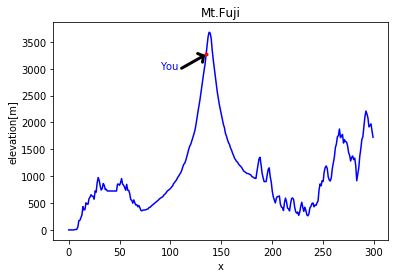

In [87]:
# Matplotlibで可視化

points = fuji[:, 0] # index(その地点の番号) を取得
elevations = fuji[:, 3] # elevationを取得

fig, ax = plt.subplots(1,1, figsize = (6,4))

ax.set_xlabel("x")
ax.set_ylabel("elevation[m]")
ax.set_title("Mt.Fuji")

ax.plot(points, elevations, c = "b") # 全体の等構図を描く
ax.plot(points[135], elevations[135], c = "r", marker = ".") # 頂点をplotする

ax.annotate(s='', xy=(110, 3000),xytext=(135 ,elevations[135]),xycoords='data',\
            arrowprops=dict(facecolor='black',arrowstyle='<-, head_width=0.5',lw=3,shrinkA=1,shrinkB=1))

ax.annotate("You", xy = (90, 3000), size = 10, color="b")

# 【問題2】勾配の計算の関数

In [3]:
def slope_calc(points,elevations,i):
    diff_elevations = elevations[i-1]-elevations[i]
    diff_points = points[i-1] - points[i]
    slope = diff_elevations / diff_points
    return slope

In [4]:
point_init = fuji[:, 0].astype(np.int64)
point_init
#slope_calc(points,elevations, point_init)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# 問題３：勾配降下法の関数を作成する

 - 勾配降下法を行う関数を作成する。
 
 - 移動すべき地点 = 今いる地点 - α × 今いる地点の勾配

In [97]:
# 勾配降下法の関数を作成する

def gradient_fall_method(points, elevatons, point_init, α = 0.5): # α：ハイパーパラメータ、x: 初期地点
   
    # 初期条件
    point = point_init # 地点
    
    # 移動先の地点、標高、勾配を格納する空リストをつくる
        
    point_history = [point_init]
    elevations_at_moved_point = [elevations[point_init]]
    slopes_at_each_point_history = []
    count = 0
        
    # 移動幅を表す変数(1で初期化)
        
    
    # 地点間の移動幅が1未満となるまで、以下1.~3.を繰り返す
        
    while True:
        #  1. 勾配を計算する
        slope = slope_calc(points, elevations, point)
        slopes_at_each_point_history.append(round(slope,1))
    
        # 2. 次の地点を計算し、リストに格納する（あとで可視化に使用する）
        step = α * slope
        point = int(np.round(point - step)) # 四捨五入する
        point_history.append(point) # リストに追加する 
                
        #  3. 移動した地点の標高を求めて、リストに格納する（可視化に使用する）
        elevation = elevations[point] # 移動先の標高
        elevations_at_moved_point.append(elevation)
        count += 1
                
        if abs(step) < 1: # 移動幅が1未満で停止(break)
            print('step<1')
            break
        
        if count > 200:
            break
        
        minimum_point = point_history[-1]
        minimum_elevation = elevations_at_moved_point[-1]
    
    return point_history,  elevations_at_moved_point, slopes_at_each_point_history, minimum_point, minimum_elevation # 出力

step<1
地点の変化:[136, 85, 80, 79]
標高の変化:[3434.59, 505.1, 420.6, 418.41]
勾配の変化:[168.4, 16.7, 2.2]
標高が最小となる地点：80
標高の最小値：420.6


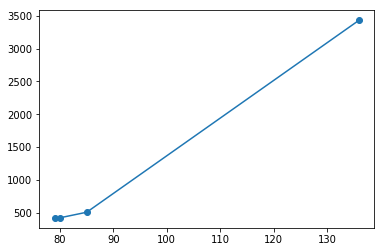

In [98]:
point_init = 136 # 初期地点
α = 0.3

point_history,  elevations_at_moved_point, slopes_at_each_point_history, minimum_point, minimum_elevation = gradient_fall_method(points, elevations, point_init, α)

print("地点の変化:{}".format(point_history))
print("標高の変化:{}".format(elevations_at_moved_point))
print("勾配の変化:{}".format(slopes_at_each_point_history))
print("標高が最小となる地点：{}".format(minimum_point))
print("標高の最小値：{}".format(minimum_elevation))

plt.plot(point_history, elevations_at_moved_point, marker="o")
plt.show()

# 【問題4】初期値の変更

- 初期値を140に変更。

- alphaを以下のパターンで変更した。


  - 0.1
  - 0.15
  - 0.2

step<1
地点の変化:[140, 150, 159, 166, 167, 171, 175, 176, 176]
標高の変化:[3567.76, 2146.01, 1525.57, 1259.24, 1222.48, 1124.83, 1053.28, 1049.33, 1049.33]
勾配の変化:[-97.1, -95.0, -65.4, -13.7, -36.8, -36.0, -14.8, -4.0]
標高が最小となる地点：176
標高の最小値：1049.33


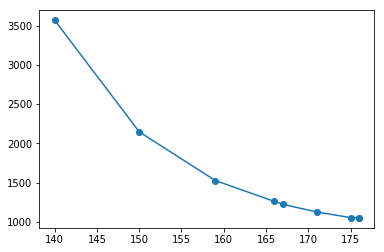

In [90]:
point_init = 140 # 初期地点
α = 0.1

point_history,  elevations_at_moved_point, slopes_at_each_point_history, minimum_point, minimum_elevation = gradient_fall_method(points, elevations, point_init, α)

print("地点の変化:{}".format(point_history))
print("標高の変化:{}".format(elevations_at_moved_point))
print("勾配の変化:{}".format(slopes_at_each_point_history))
print("標高が最小となる地点：{}".format(minimum_point))
print("標高の最小値：{}".format(minimum_elevation))

plt.plot(point_history, elevations_at_moved_point, marker="o")
plt.show()

地点の変化:[140, 155, 163, 171, 176, 177, 178, 180, 184, 184]
標高の変化:[3567.76, 1748.11, 1333.51, 1124.83, 1049.33, 1043.91, 1033.52, 993.63, 958.44, 958.44]
勾配の変化:[-97.1, -50.9, -50.6, -36.0, -4.0, -5.4, -10.4, -28.5, -2.1]
標高が最小となる地点：184
標高の最小値：958.44


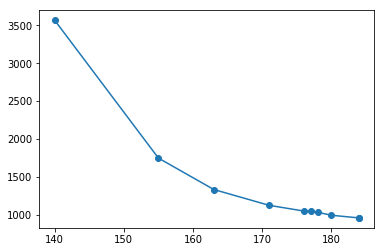

In [8]:
point_init = 140 # 初期地点
α = 0.15

point_history,  elevations_at_moved_point, slopes_at_each_point_history, minimum_point, minimum_elevation = gradient_fall_method(points, elevations, point_init, α)

print("地点の変化:{}".format(point_history))
print("標高の変化:{}".format(elevations_at_moved_point))
print("勾配の変化:{}".format(slopes_at_each_point_history))
print("標高が最小となる地点：{}".format(minimum_point))
print("標高の最小値：{}".format(minimum_elevation))

plt.plot(point_history, elevations_at_moved_point, marker="o")
plt.show()

地点の変化:[140, 159, 172, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164

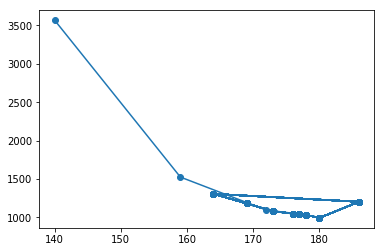

In [9]:
point_init = 140 # 初期地点
α = 0.2

point_history,  elevations_at_moved_point, slopes_at_each_point_history, minimum_point, minimum_elevation = gradient_fall_method(points, elevations, point_init, α)

print("地点の変化:{}".format(point_history))
print("標高の変化:{}".format(elevations_at_moved_point))
print("勾配の変化:{}".format(slopes_at_each_point_history))
print("標高が最小となる地点：{}".format(minimum_point))
print("標高の最小値：{}".format(minimum_elevation))

plt.plot(point_history, elevations_at_moved_point, marker="o")
plt.show()

In [10]:
len(slopes_at_each_point_history)

201

# 【問題5】（アドバンス課題）並列計算

- 引数にNumpy配列を代入できるように、最小値を求める関数を再定義する。


- 再定義した関数に初期値のNumpy配列を与える

In [436]:
# 勾配降下法の関数を作成する

def gradient_fall_method_np(points, elevations, point_init, α = 0.5,max_count=300,n_latio=0.9,seed=0): # α：ハイパーパラメータ、x: 初期地点
   

    """
    points :       山のｘ軸のリスト
    elevations: 山の標高のリスト
    point_init:  初期値、現在地点
    α:                学習率
    max_count:　最大計算回数
    n_latio:       複数の初期値を与えた場合に、収束する数が初期値の数のn_latio以下になったら計算終了
    seed:          山の端っこに行くと、ランダムでどこかに飛ばされてしまうのでそのランダムシード
    """
    # 初期条件
    n_point_init = len(point_init) # 与えられた現在初期値の数
    point = point_init.reshape(n_point_init,1).astype(np.int64) # 地点
    np.random.seed(seed=seed)
    minimum_elevation = []
    
    # 移動先の地点、標高、勾配を格納する空リストをつくる
        
    point_history = point # Numpy配列で定義
    elevations_at_moved_point = elevations[point].reshape(n_point_init, 1)
    #slopes_at_each_point_history = []
    count = 0     
    
    # 地点間の移動幅が1未満となるまで、以下1.~3.を繰り返す
        
    while True:
        count += 1
        #  1. 勾配を計算する
        slope = slope_calc(points, elevations, point)
        #np.columnt_stack()
    
        # 2. 次の地点を計算し、リストに格納する（あとで可視化に使用する）
        step = α * slope
        point = np.round(point - step) # 四捨五入する
        point = np.where(point > 299, np.random.randint(299), point).astype(np.int64) #移動先が２９９以上になった場合ランダムでどっかに飛ぶ
        point = np.where(point < 0, np.random.randint(299), point).astype(np.int64) #移動先が0以下になってしまった場合ランダムでどっかに飛ぶ
        point_history = np.column_stack([point_history, point]) # Numpy配列に追加する 
                
        #  3. 移動した地点の標高を求めて、リストに格納する（可視化に使用する）
        elevation = elevations[point] # 移動先の標高
        elevations_at_moved_point = np.column_stack([elevations_at_moved_point, elevation])

        α = α * 0.99 #少しずつ学習率が小さくなる感じ

        total_nostep = (abs(step)<1).sum() #移動幅が1未満の数
        
        if total_nostep > n_latio*n_point_init: # 移動幅がstep_width未満の数が全体のうちxnum_latio割以上になったら停止
            print('nostep={}'.format(total_nostep))
            break
            
        if count >max_count: #max_count以上計算したら停止
            print('count>{}'.format(max_count))
            break
        #minimum_points = np.column_stack([point_init, np.min(point_history,axis=1)])
    minimum_elevation = np.column_stack([point_init, np.min(elevations_at_moved_point,axis=1)])
   
    return point_history,  elevations_at_moved_point,minimum_elevation # 出力

In [437]:
# 初期値の配列を用意する
# なんとなく30の地点以降全ての地点を初期値にした。
point_init = fuji[30:, 0].astype(np.int64)
α = 0.3

# 並列計算を実行する
point_history,  elevations_at_moved_point, minimum_elevation = gradient_fall_method_np(points, elevations, point_init, α,seed=1)
point_history

nostep=264


array([[ 30,  47,  47, ...,  47,  47,  47],
       [ 31,  62,  66, ...,  75,  75,  75],
       [ 32,  54,  59, ...,  75,  75,  75],
       ...,
       [297, 288, 237, ..., 174, 176, 177],
       [298,  37,  35, ...,  46,  46,  46],
       [299,  37,  35, ...,  46,  46,  46]])

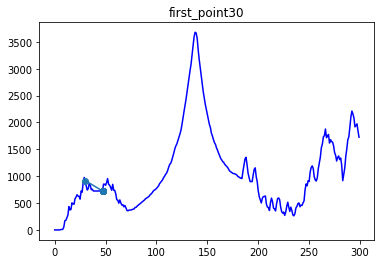

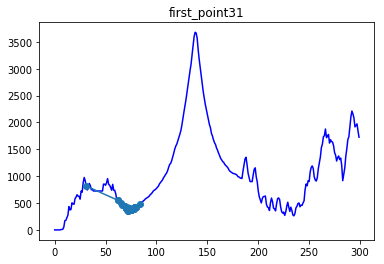

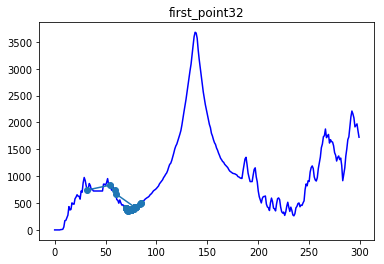

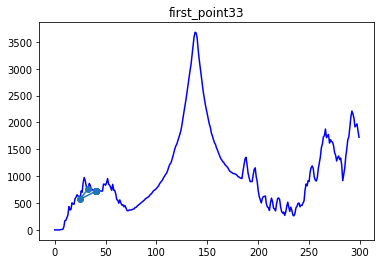

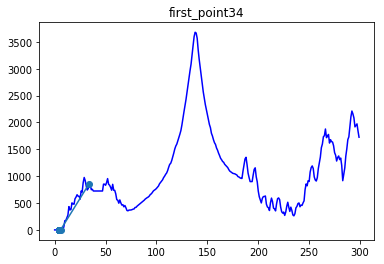

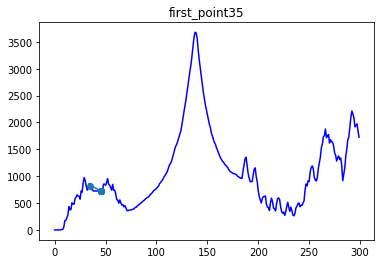

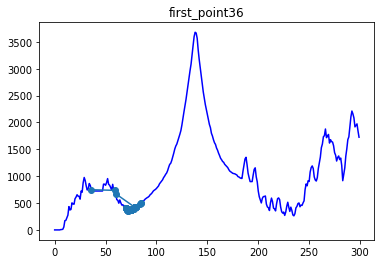

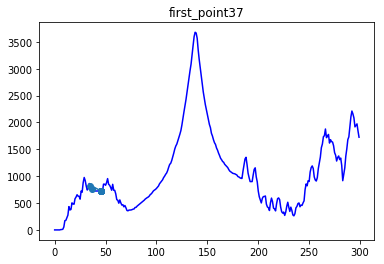

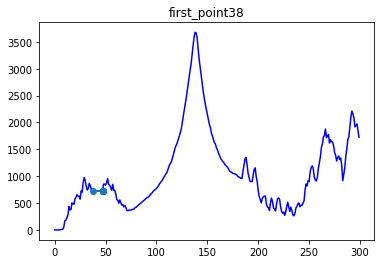

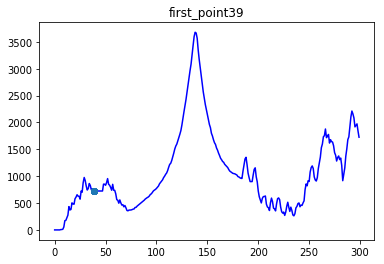

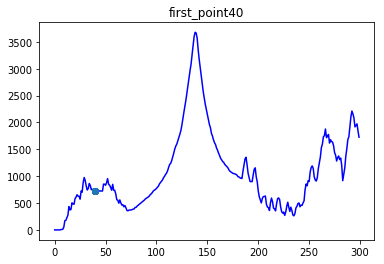

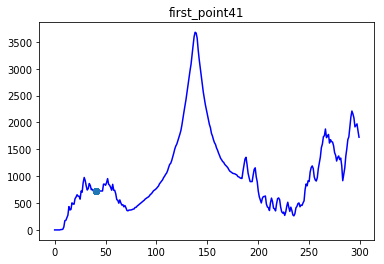

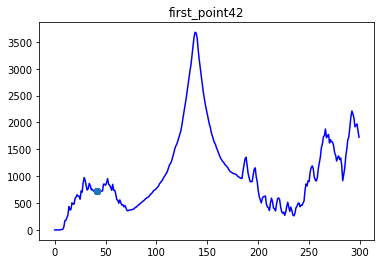

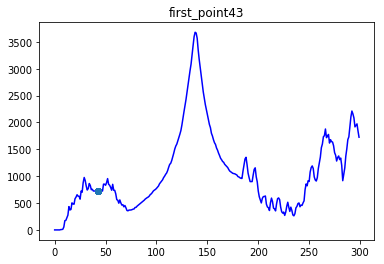

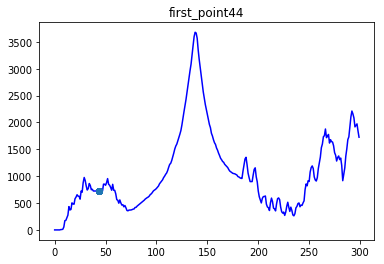

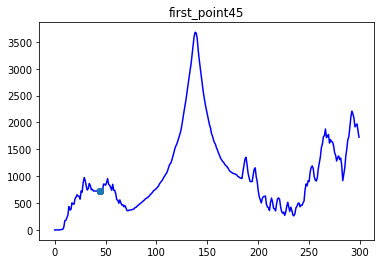

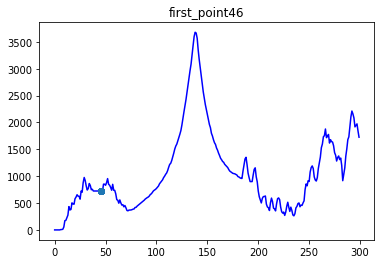

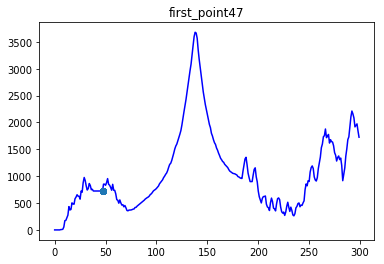

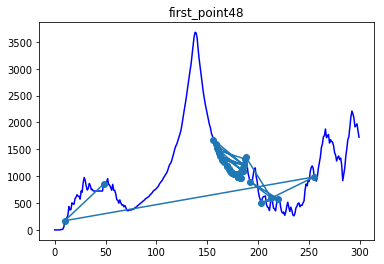

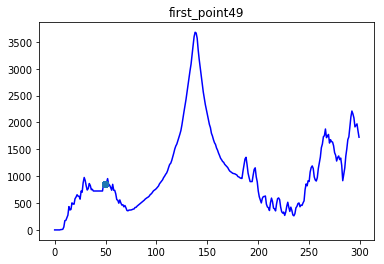

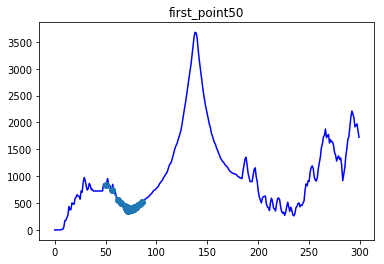

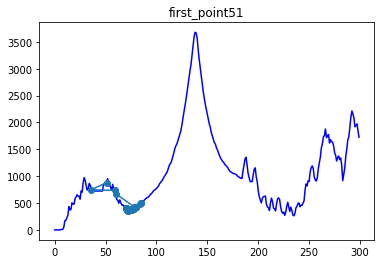

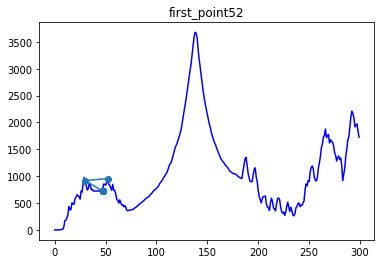

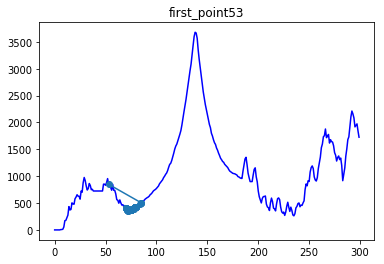

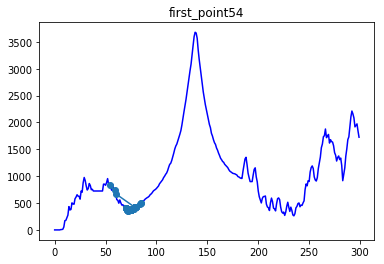

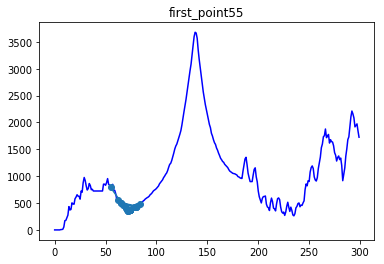

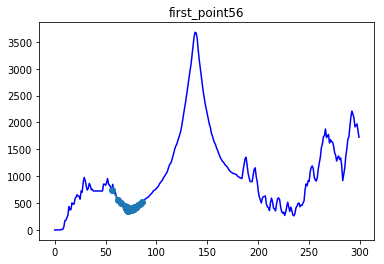

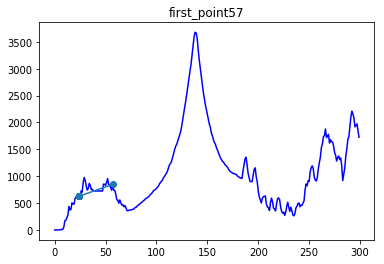

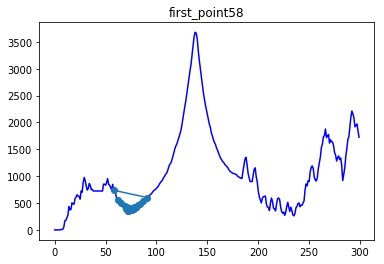

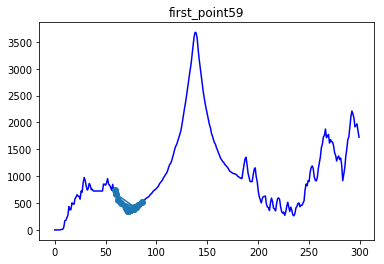

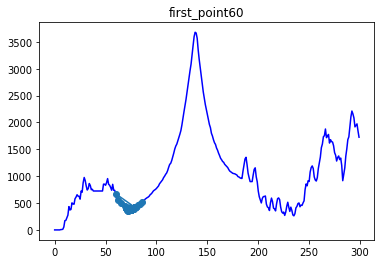

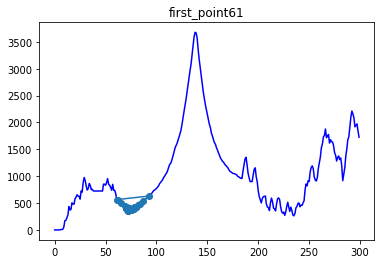

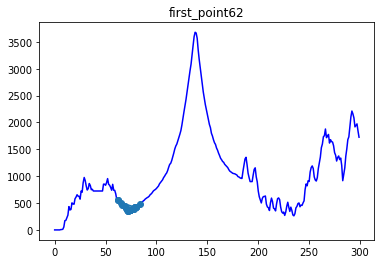

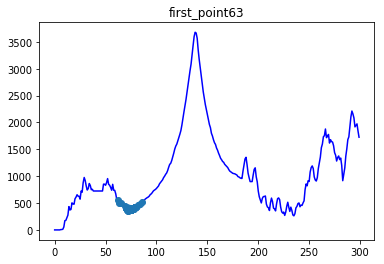

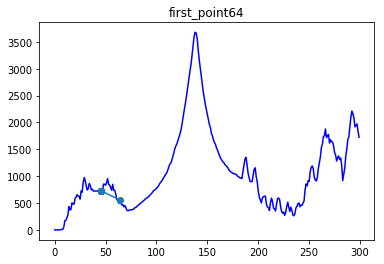

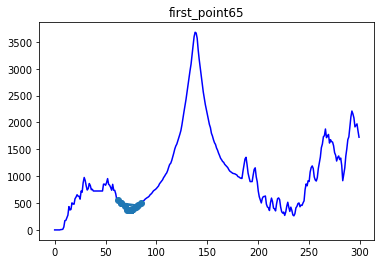

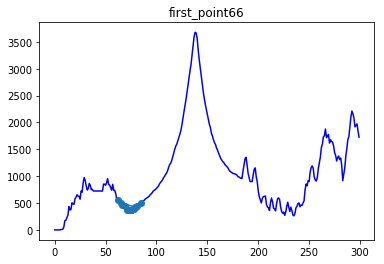

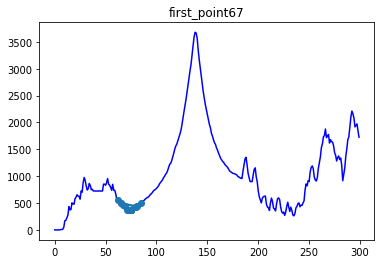

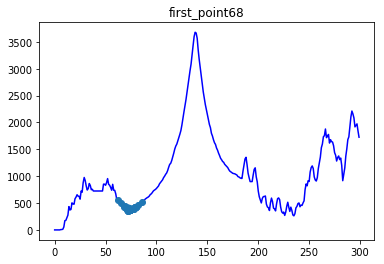

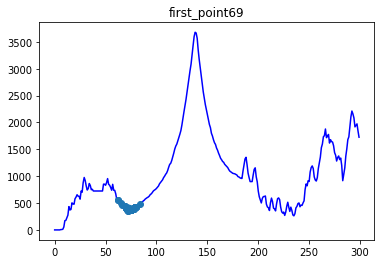

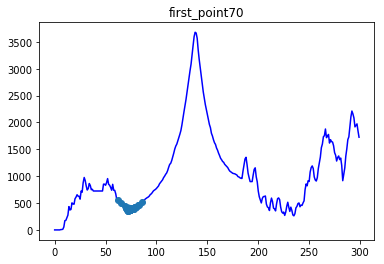

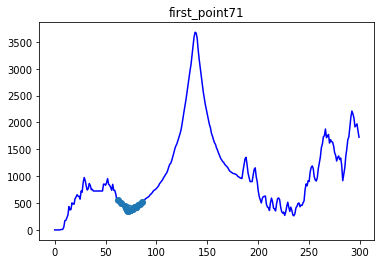

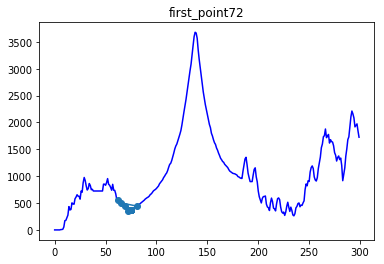

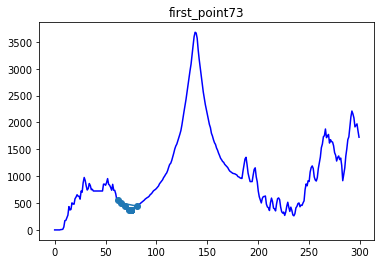

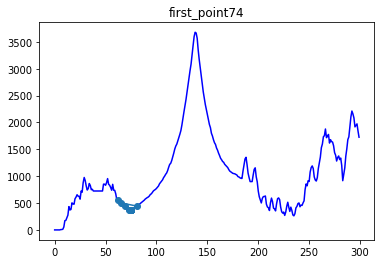

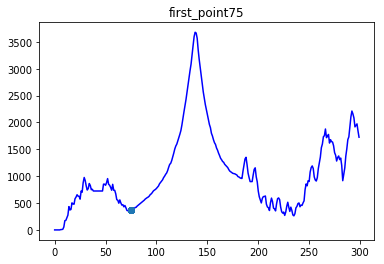

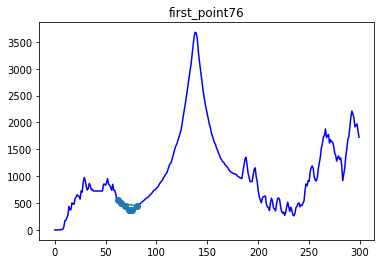

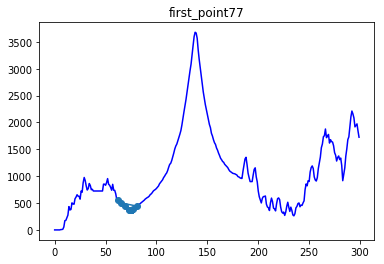

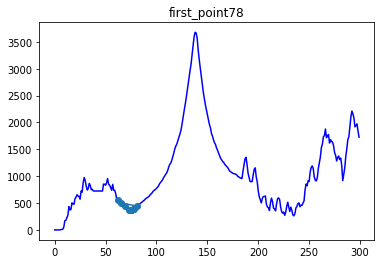

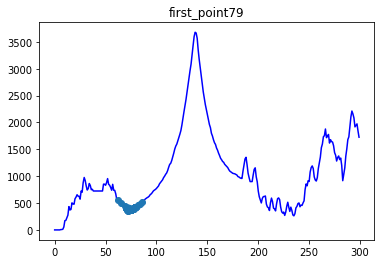

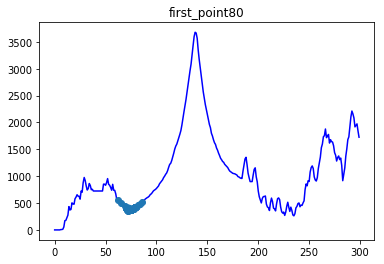

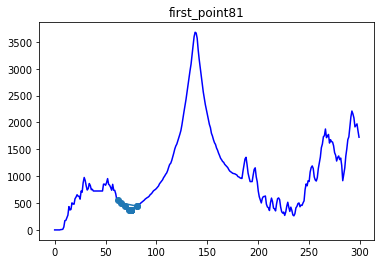

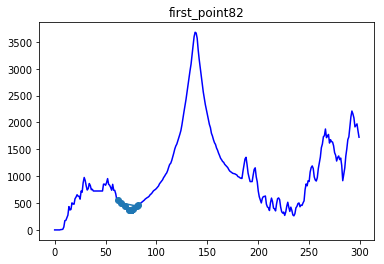

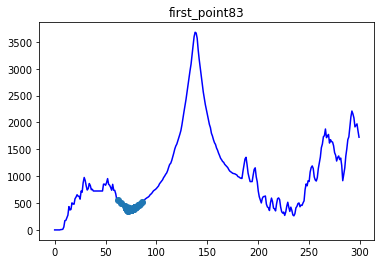

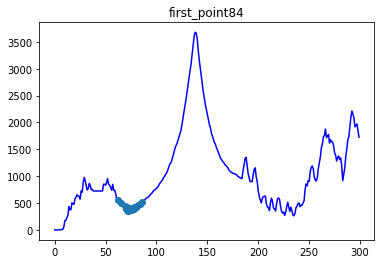

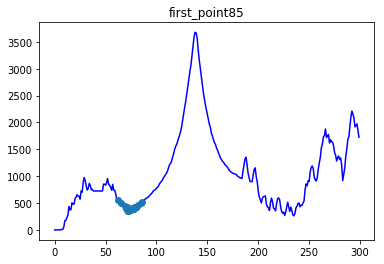

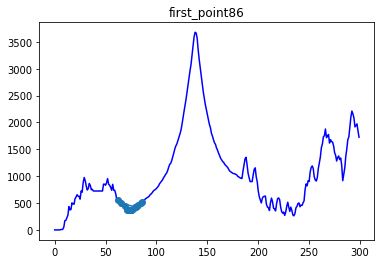

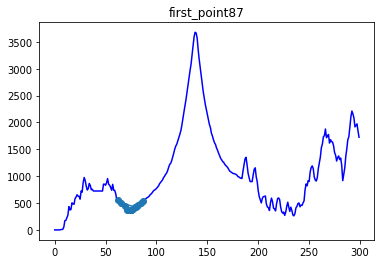

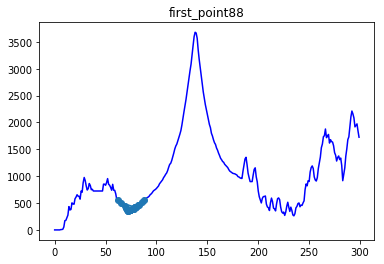

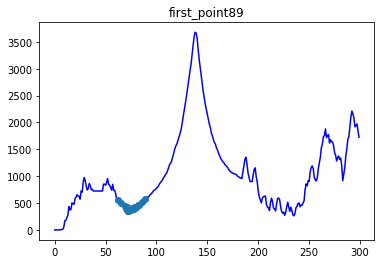

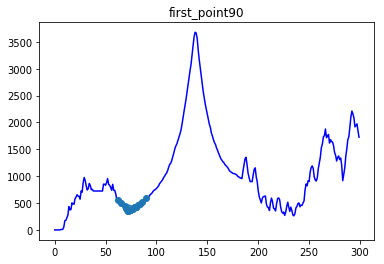

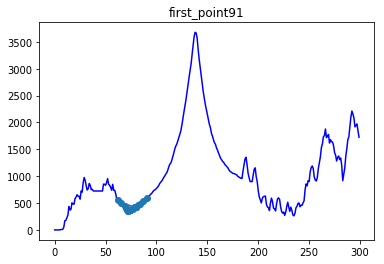

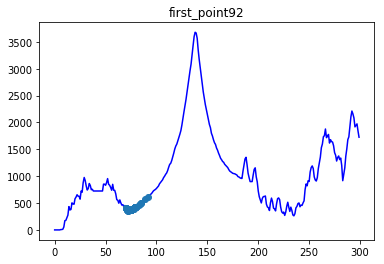

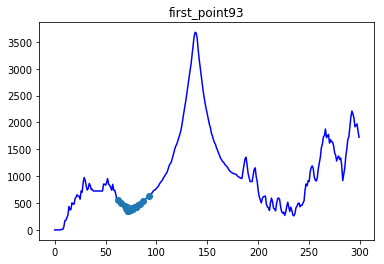

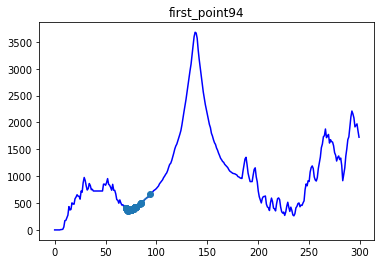

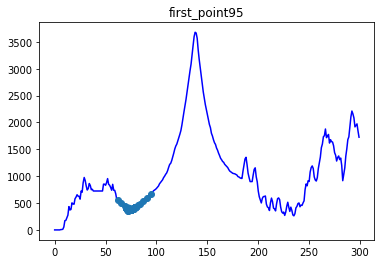

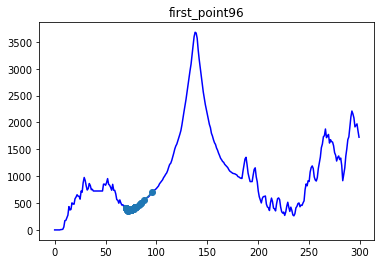

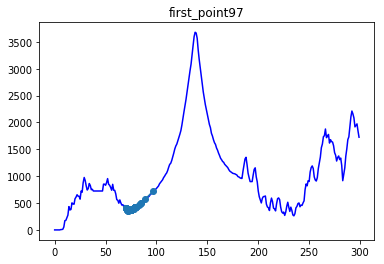

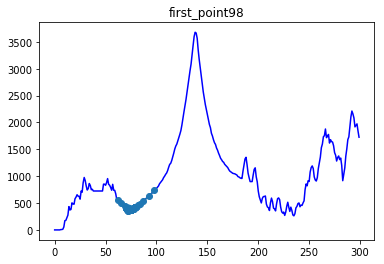

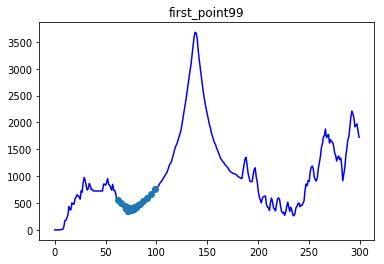

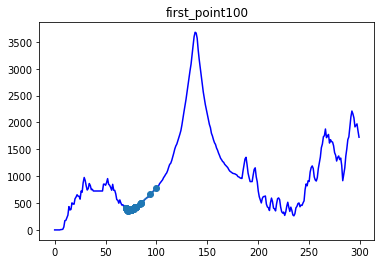

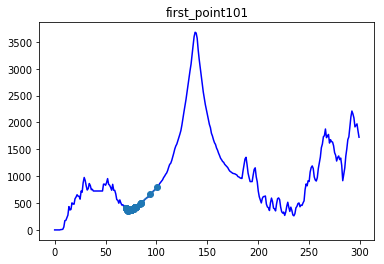

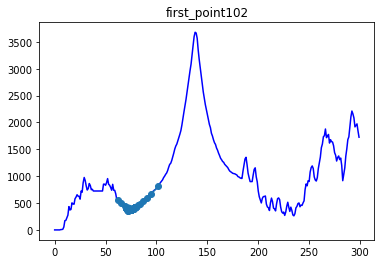

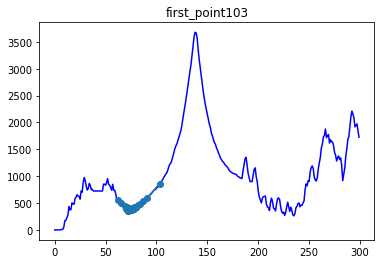

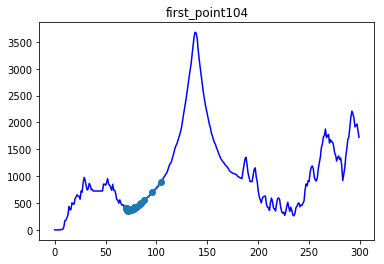

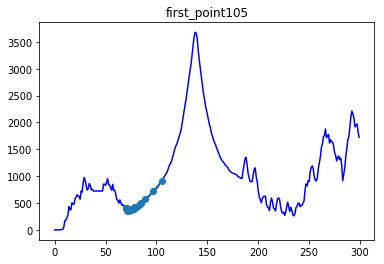

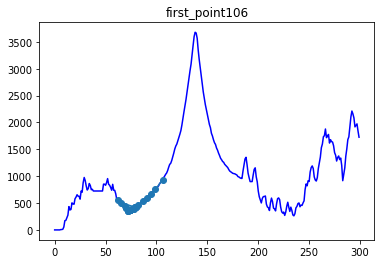

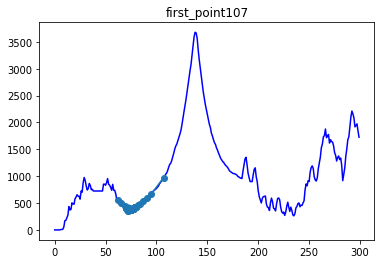

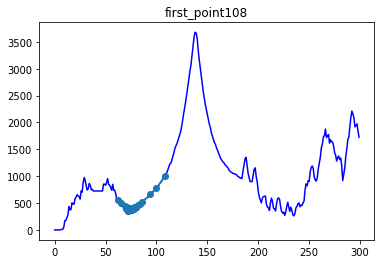

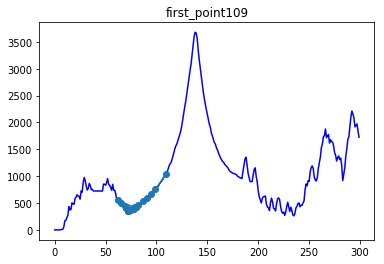

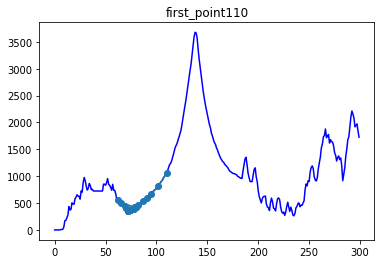

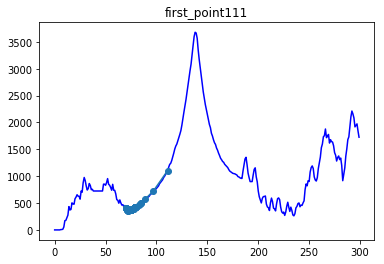

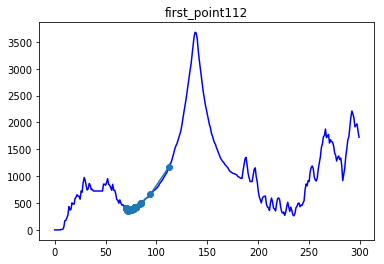

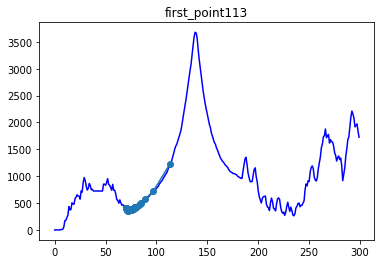

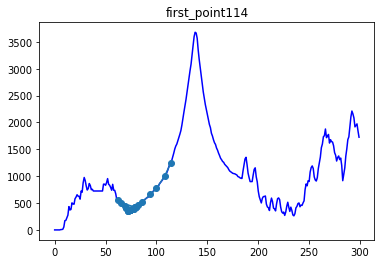

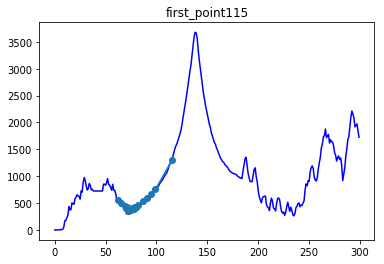

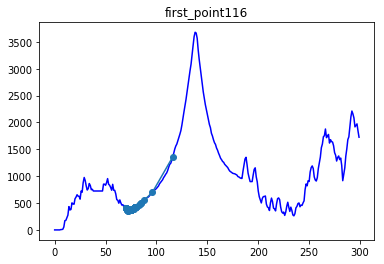

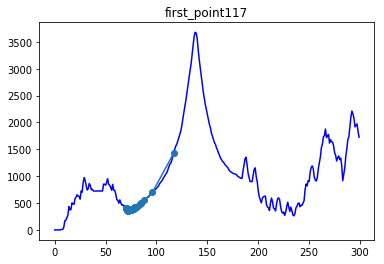

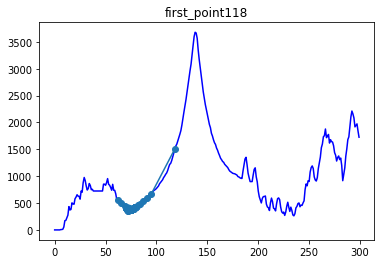

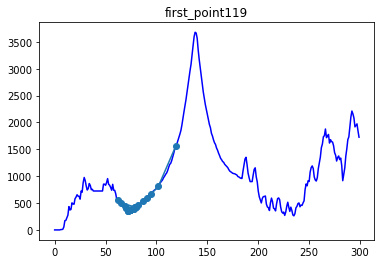

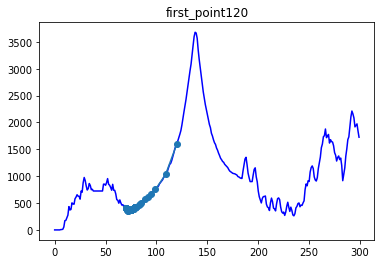

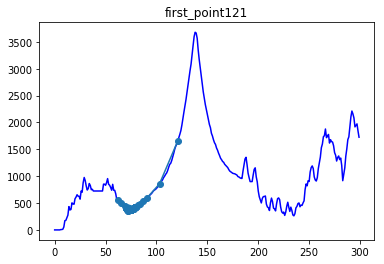

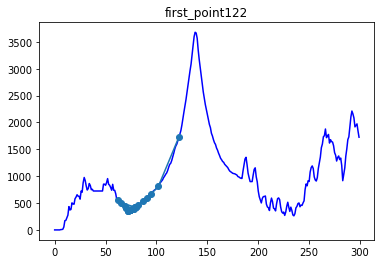

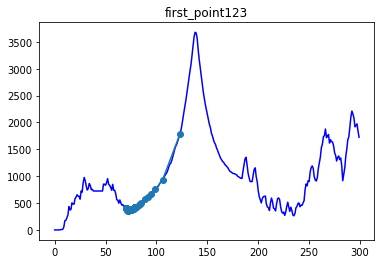

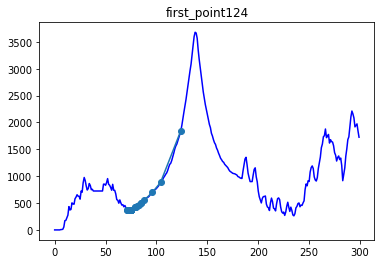

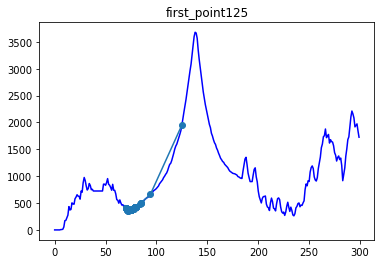

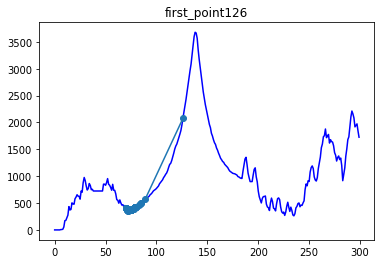

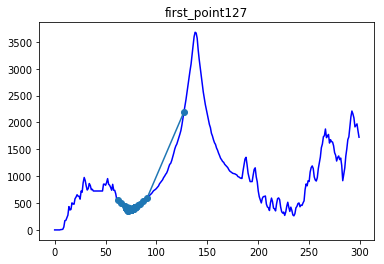

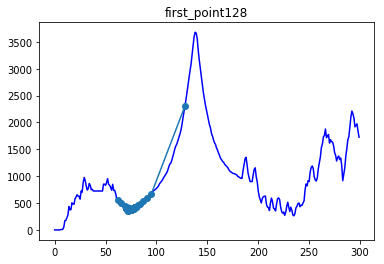

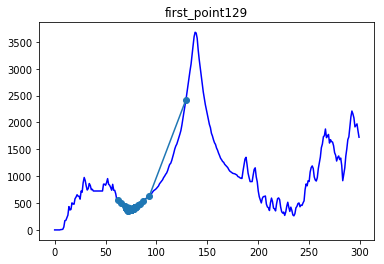

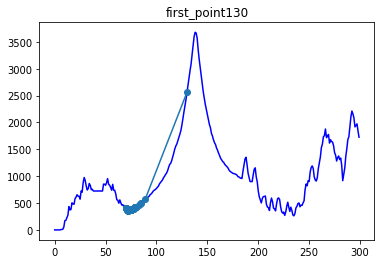

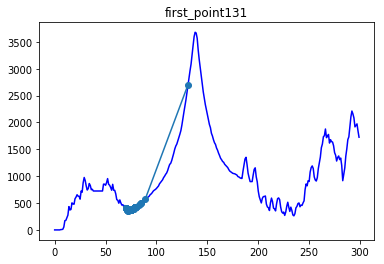

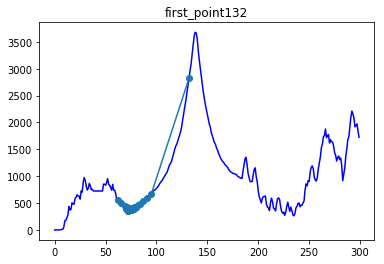

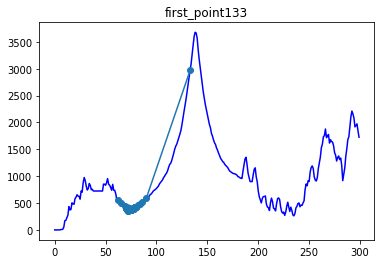

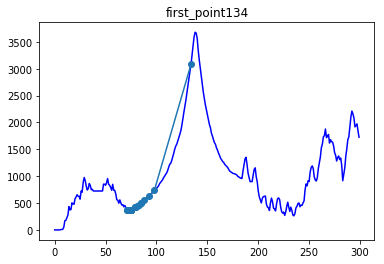

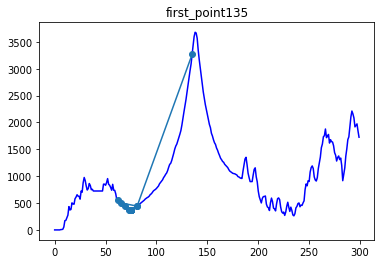

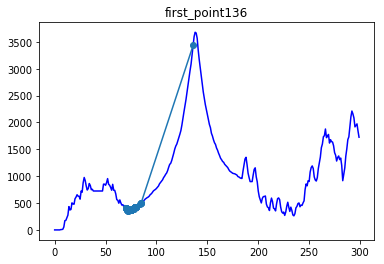

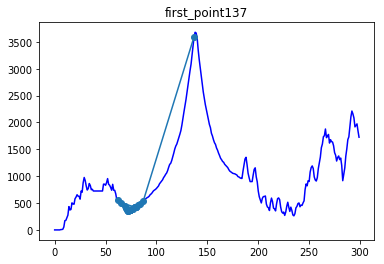

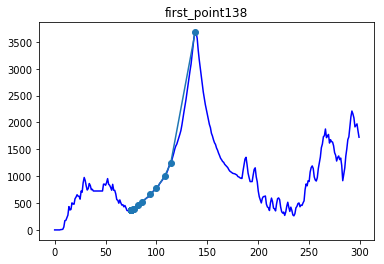

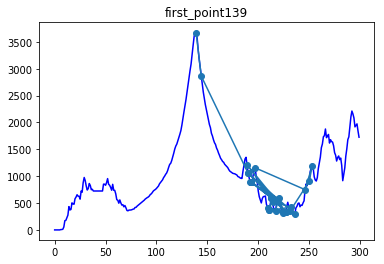

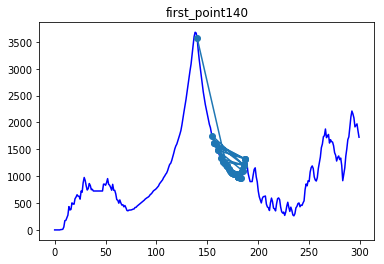

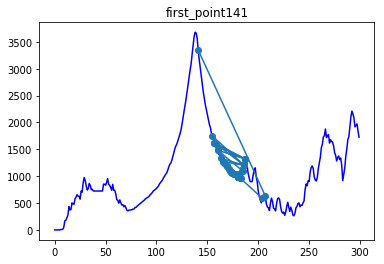

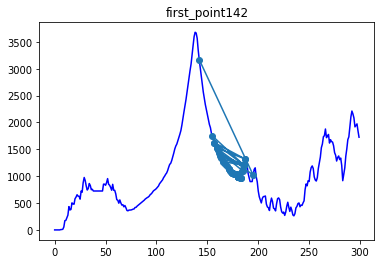

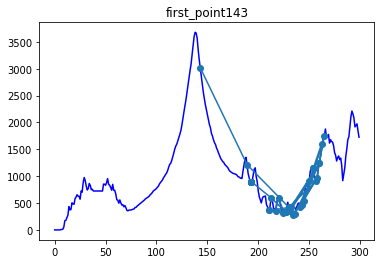

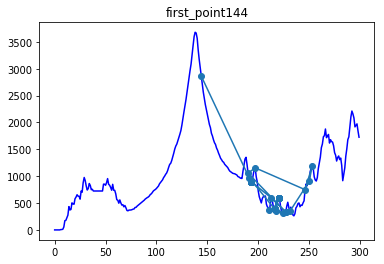

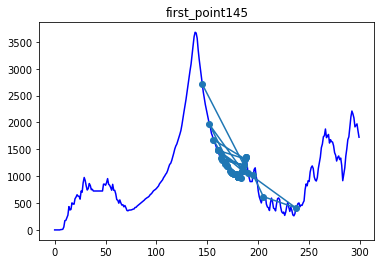

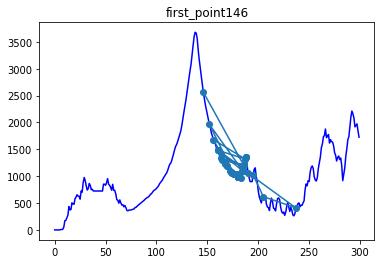

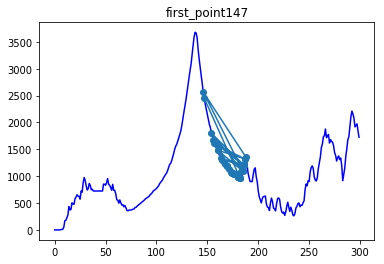

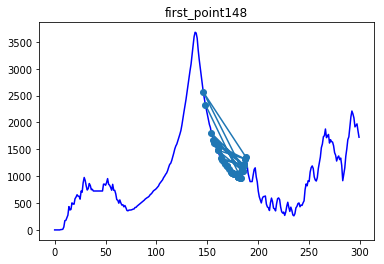

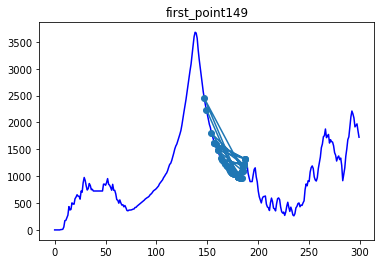

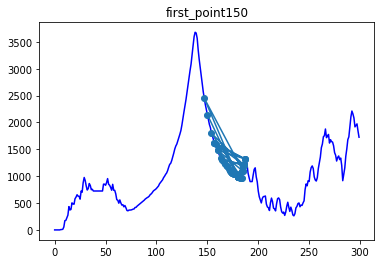

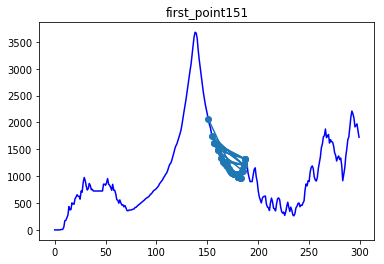

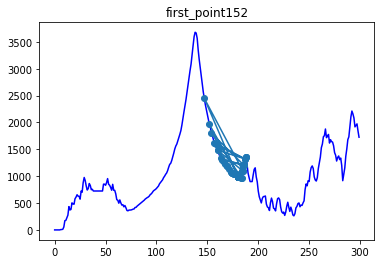

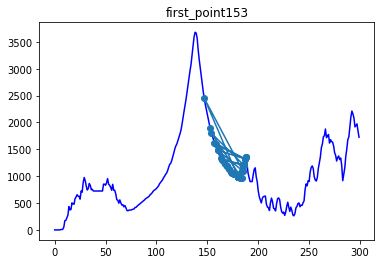

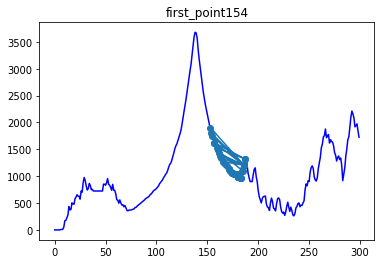

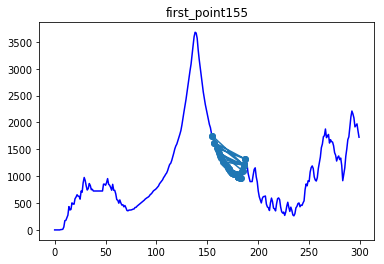

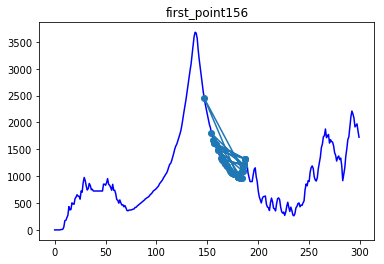

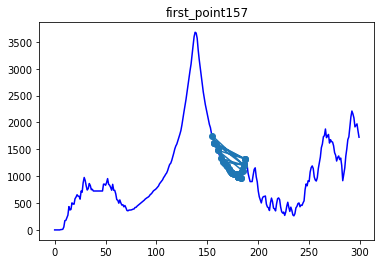

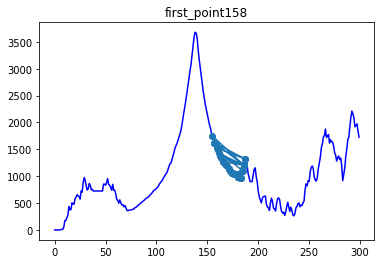

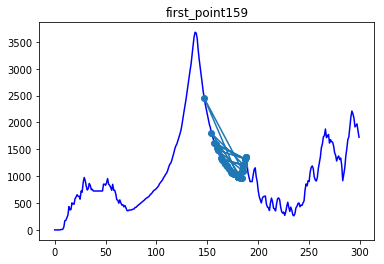

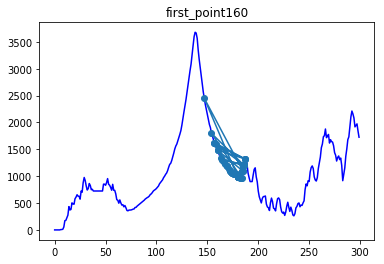

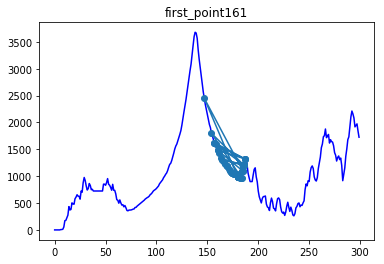

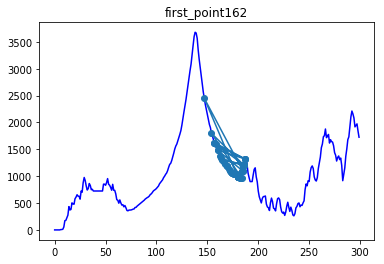

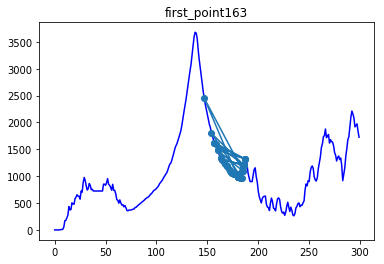

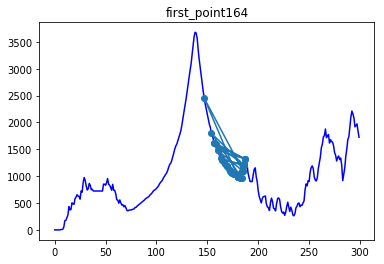

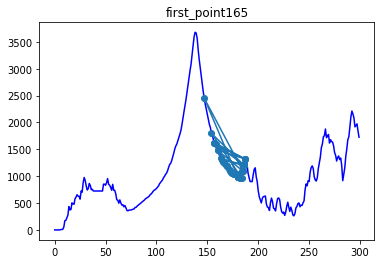

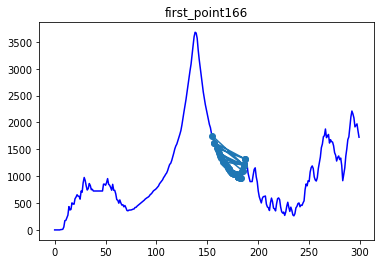

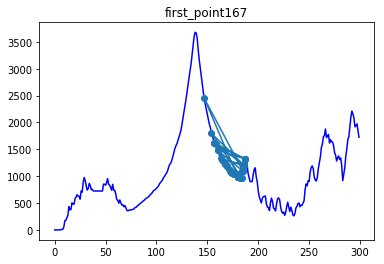

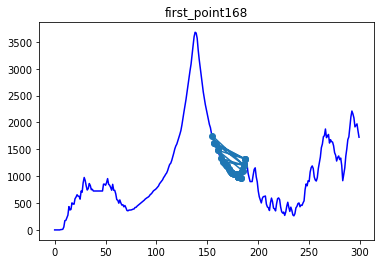

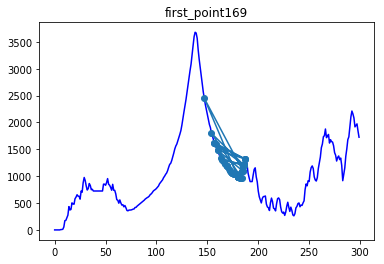

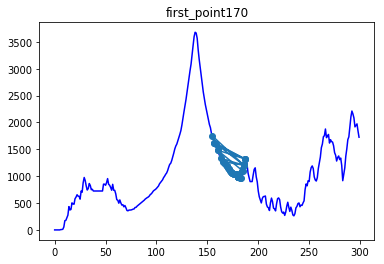

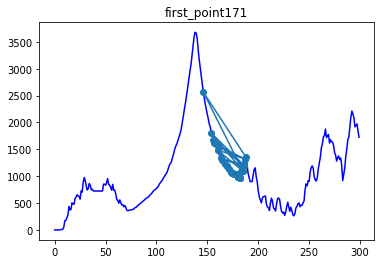

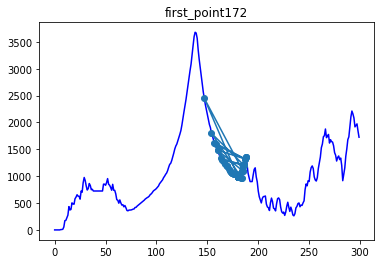

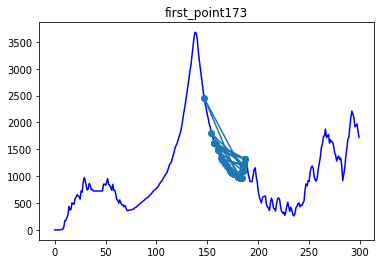

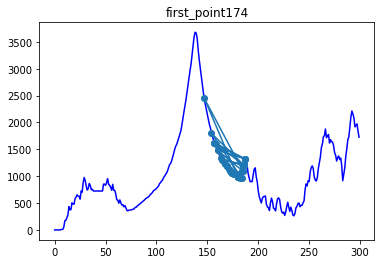

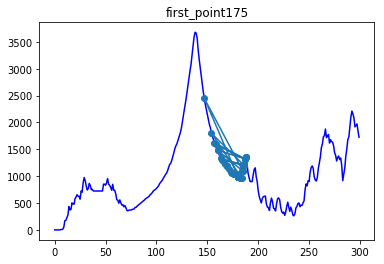

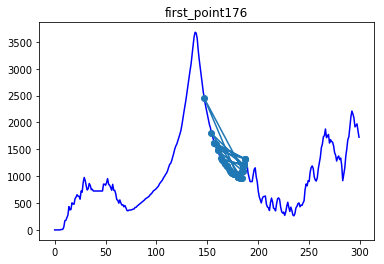

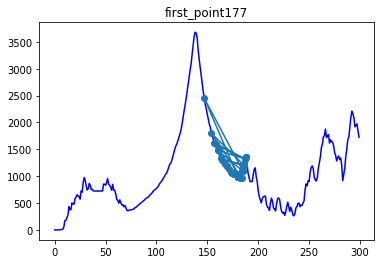

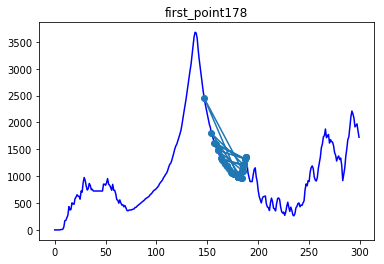

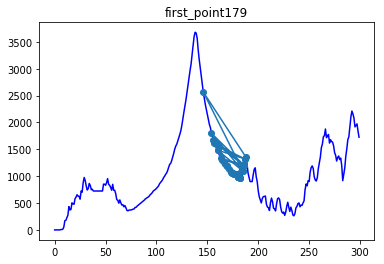

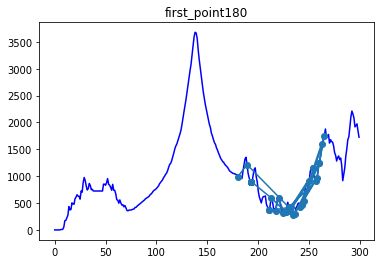

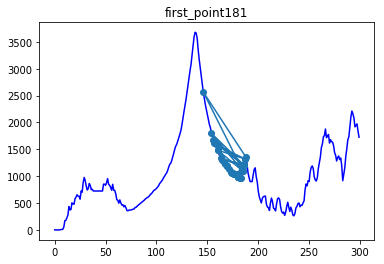

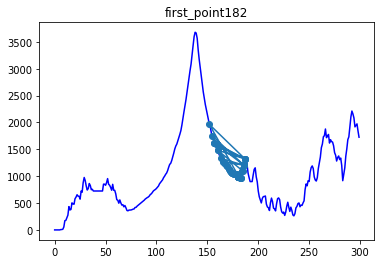

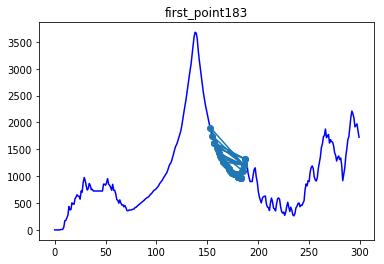

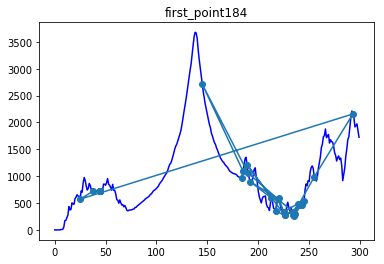

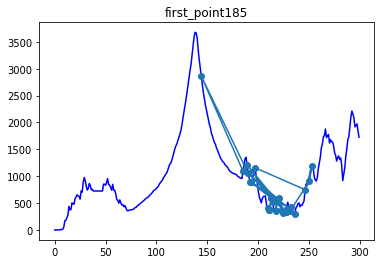

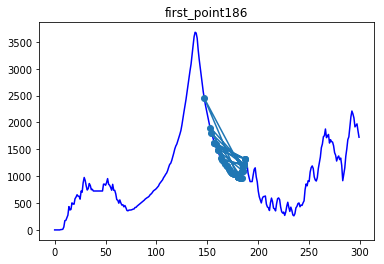

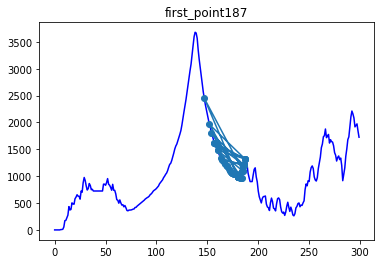

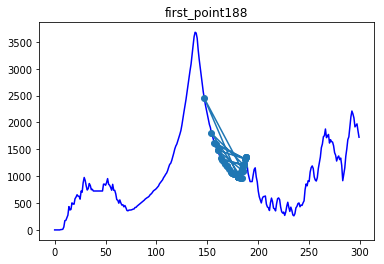

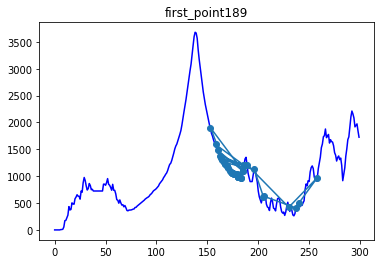

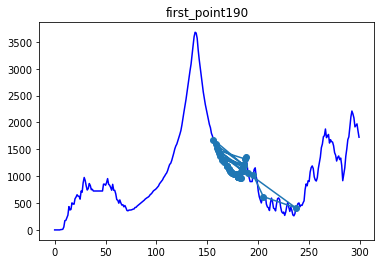

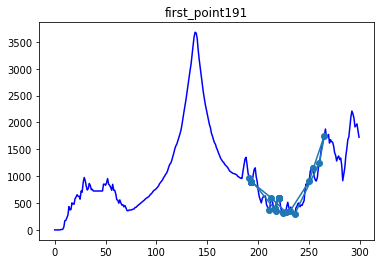

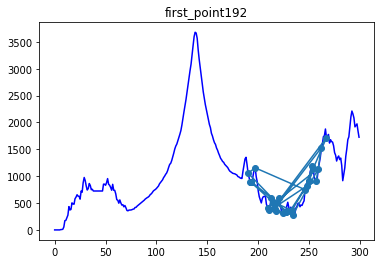

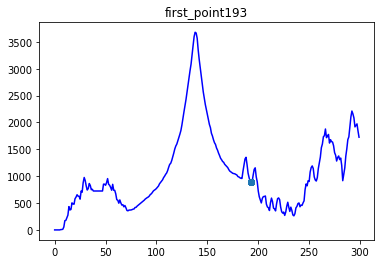

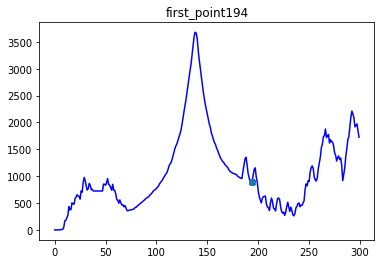

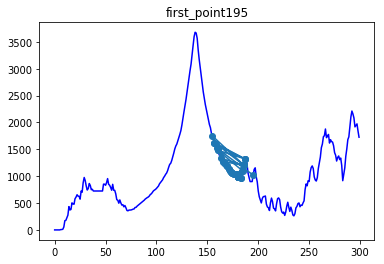

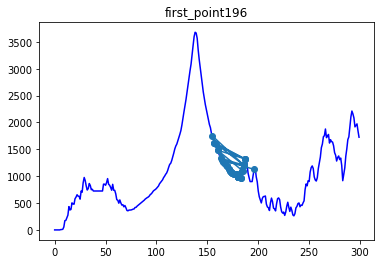

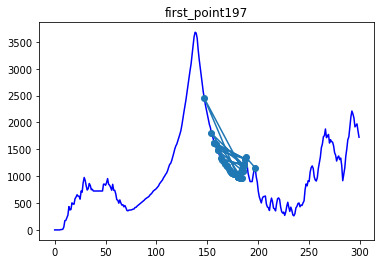

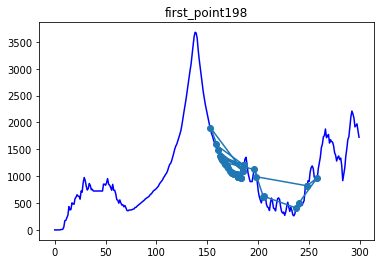

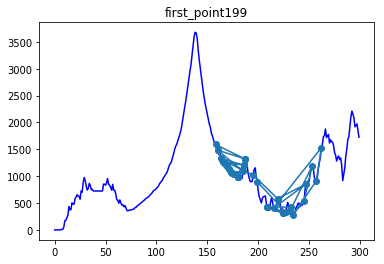

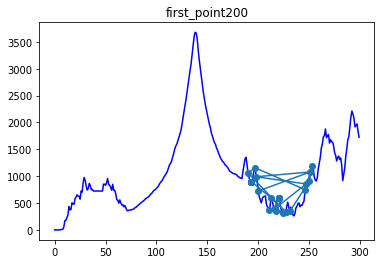

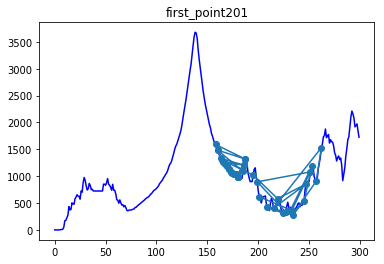

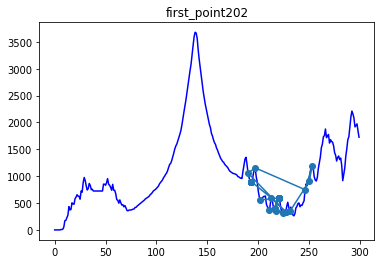

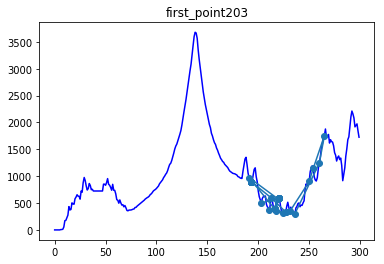

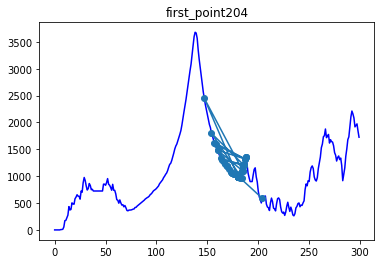

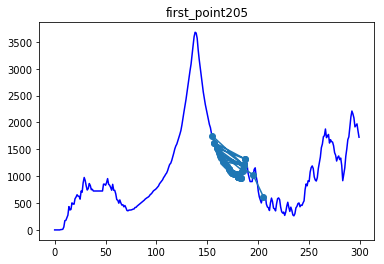

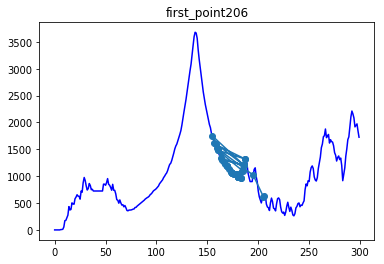

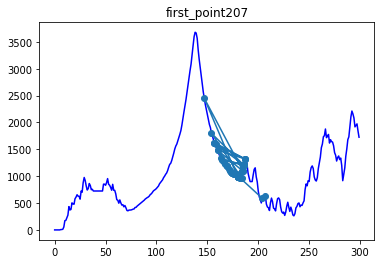

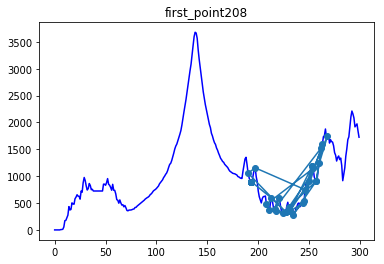

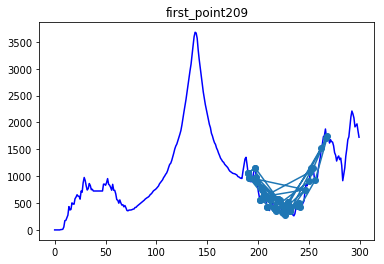

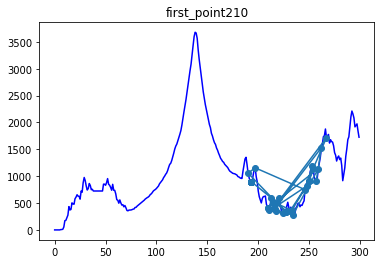

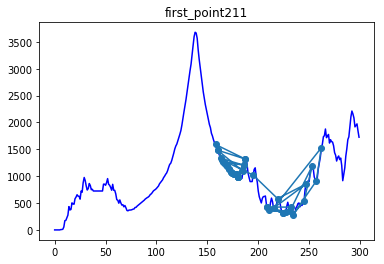

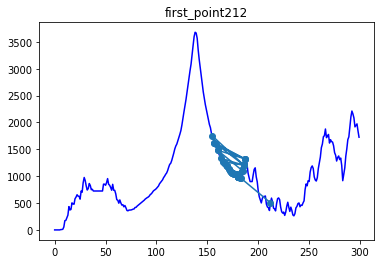

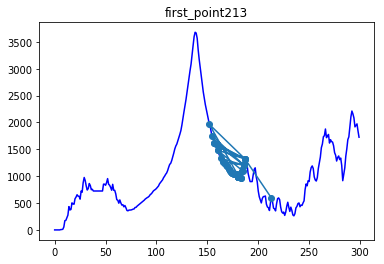

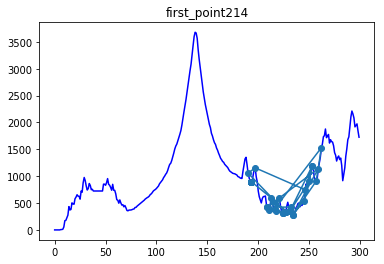

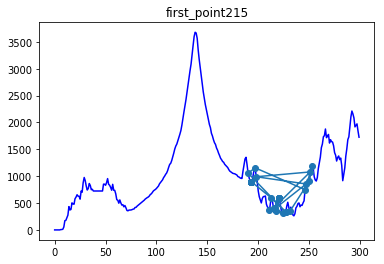

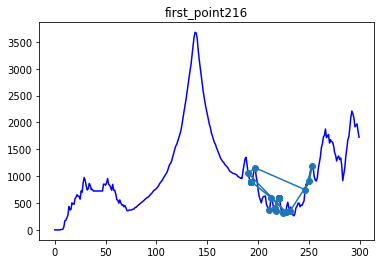

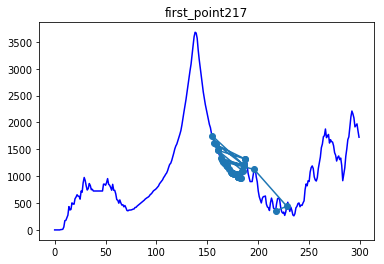

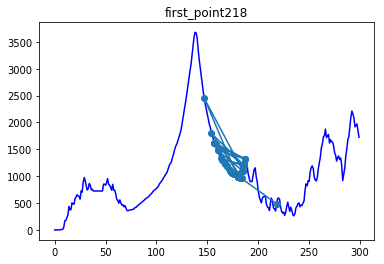

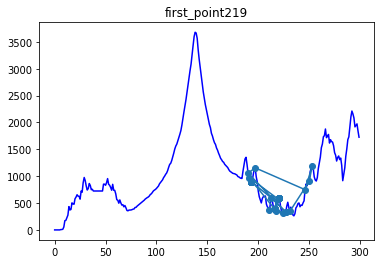

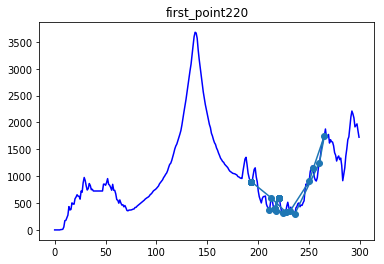

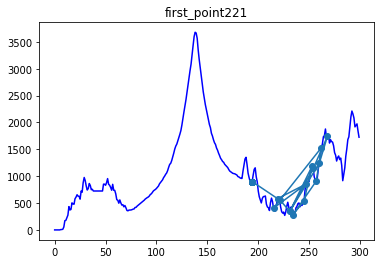

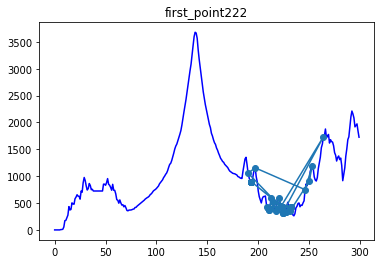

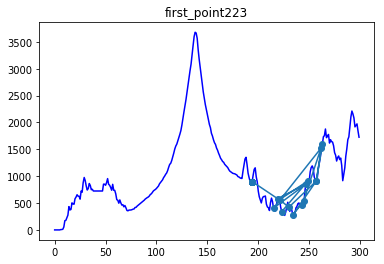

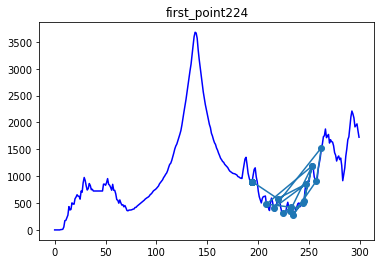

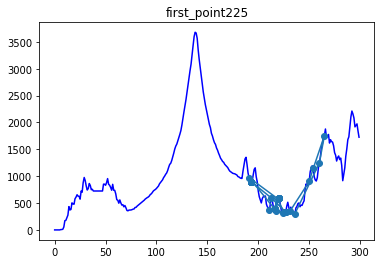

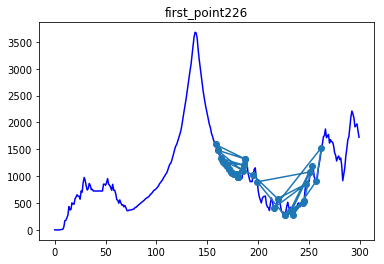

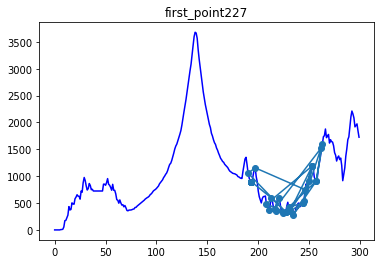

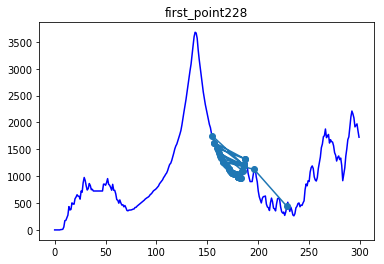

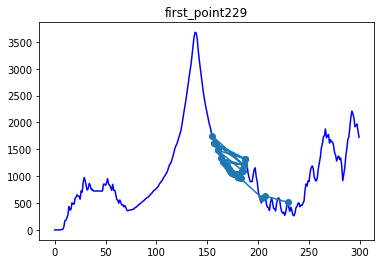

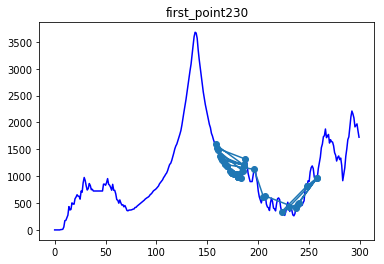

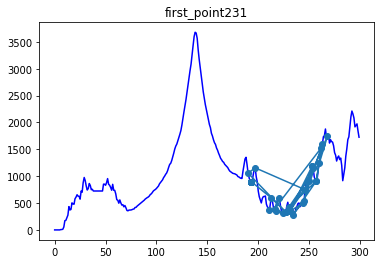

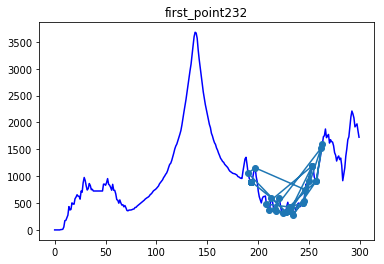

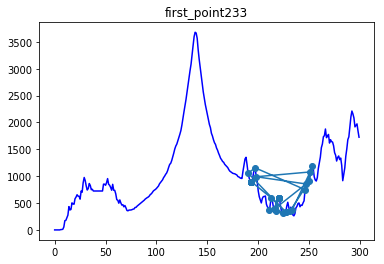

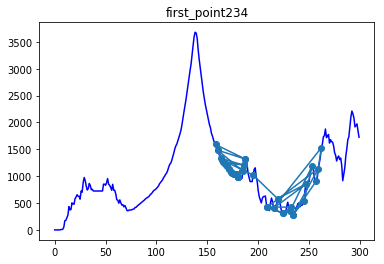

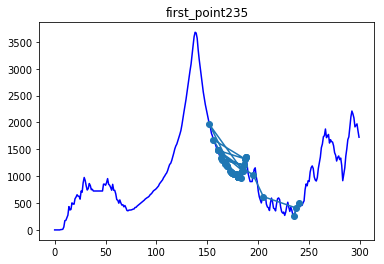

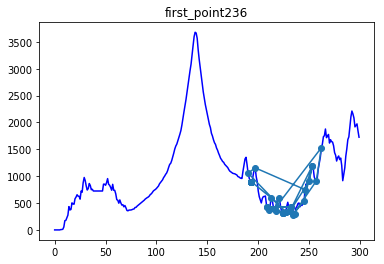

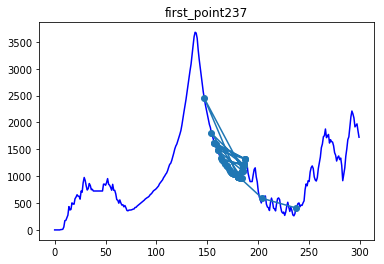

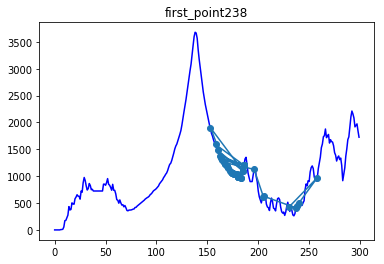

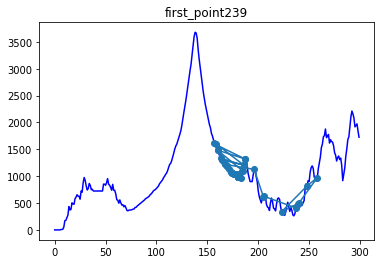

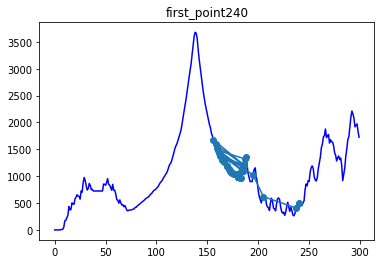

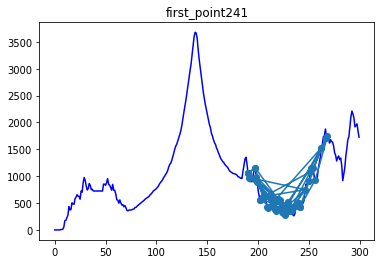

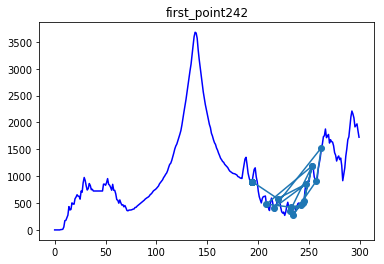

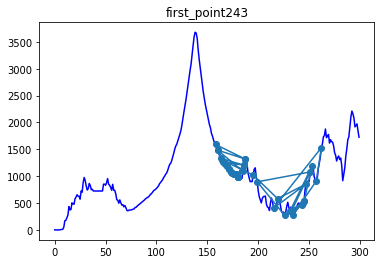

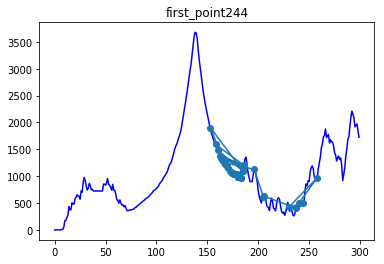

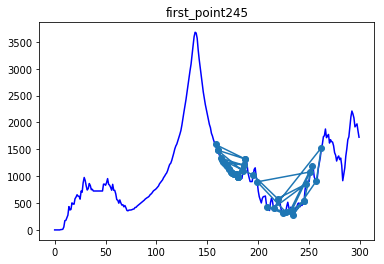

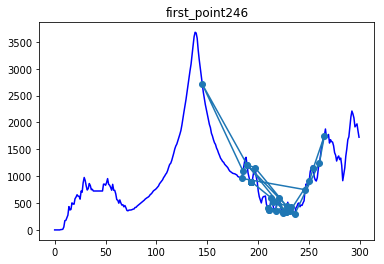

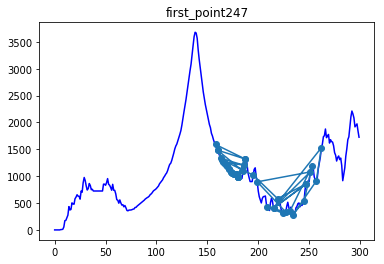

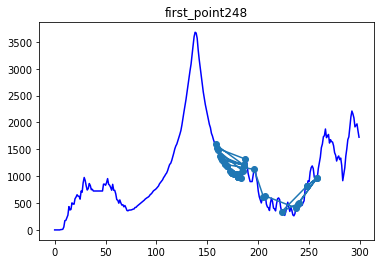

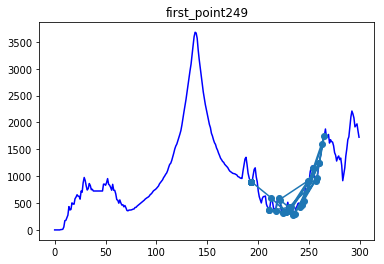

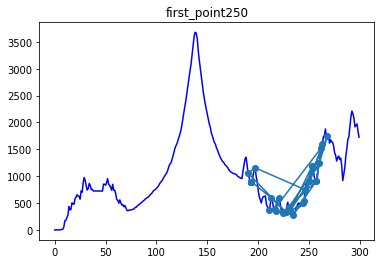

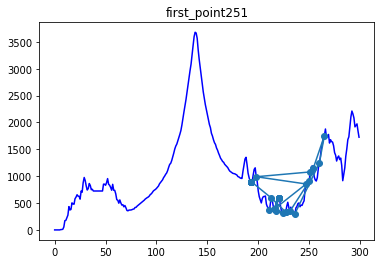

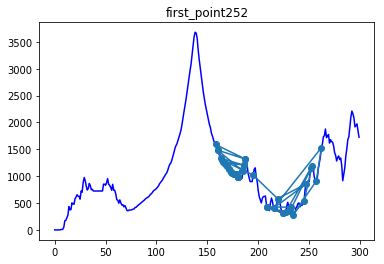

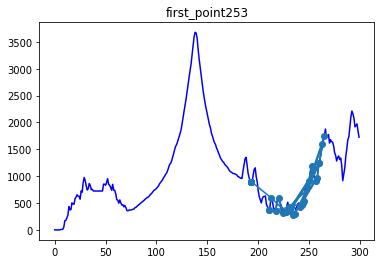

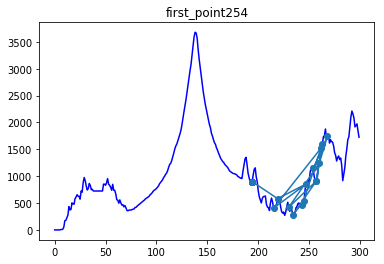

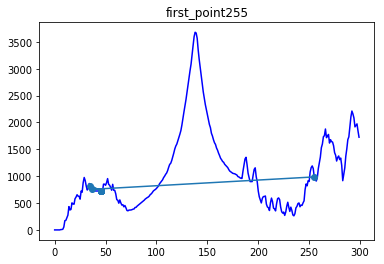

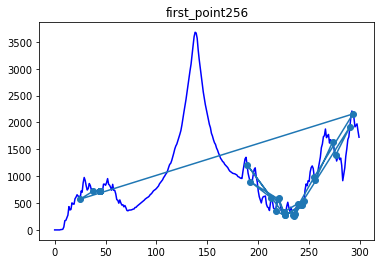

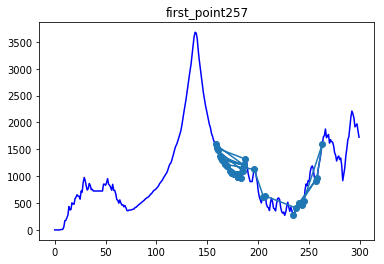

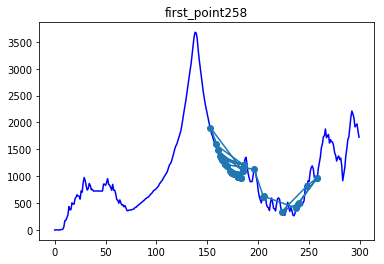

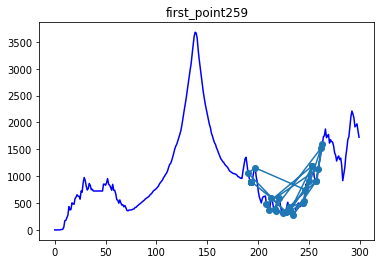

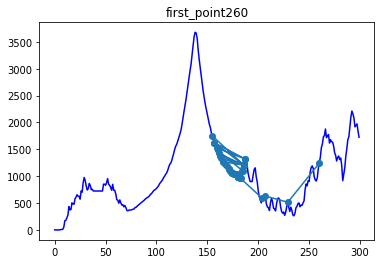

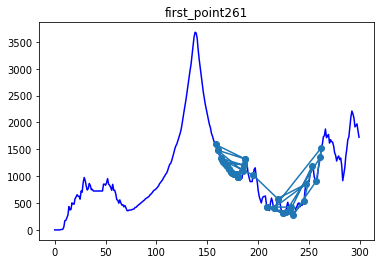

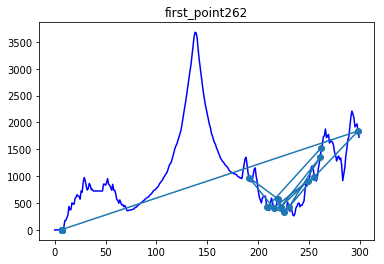

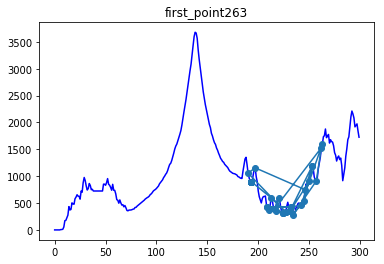

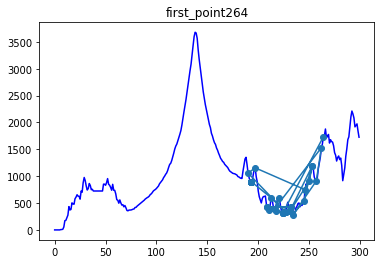

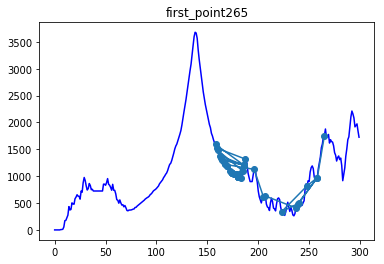

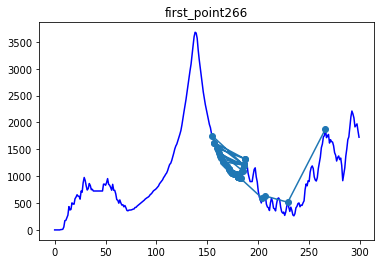

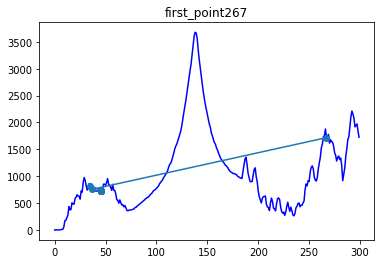

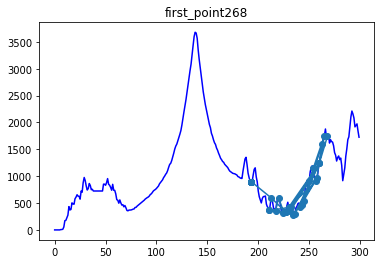

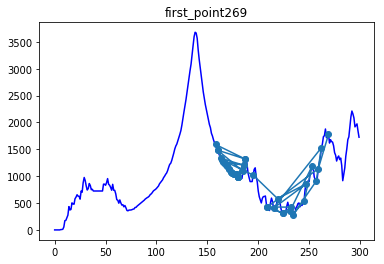

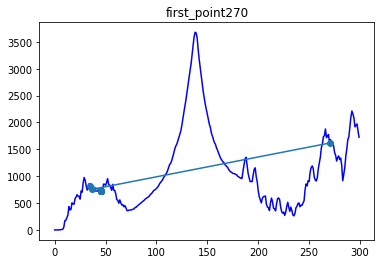

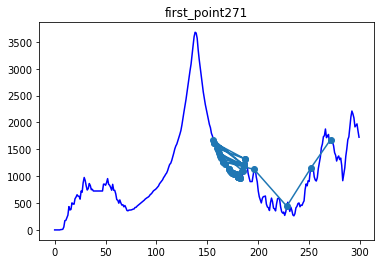

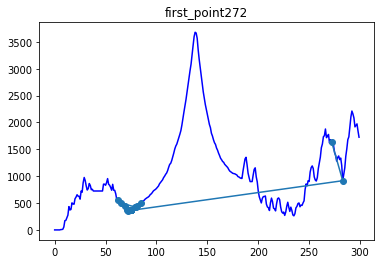

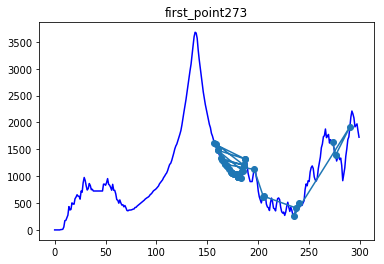

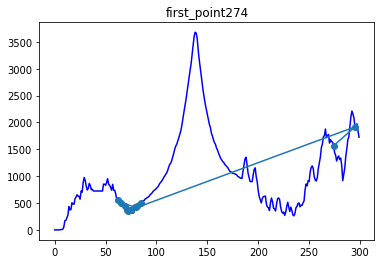

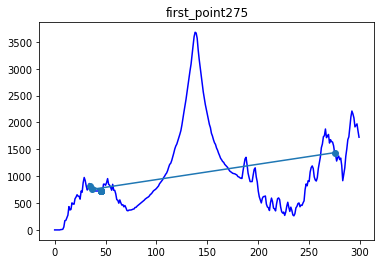

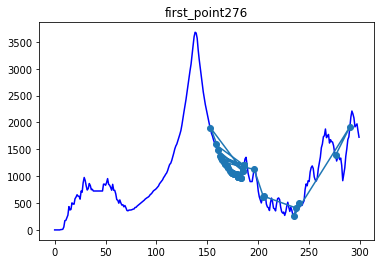

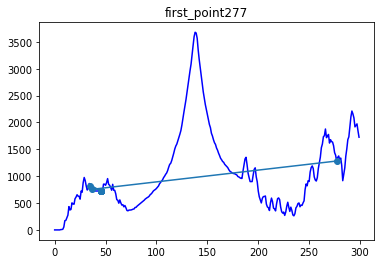

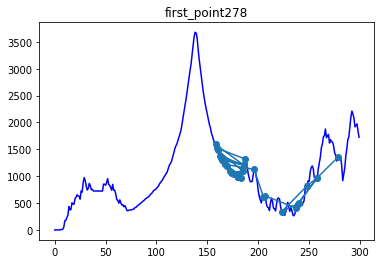

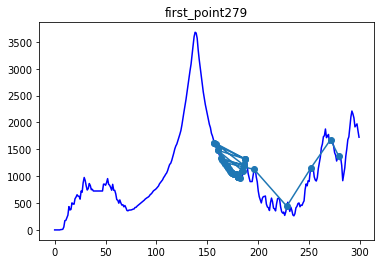

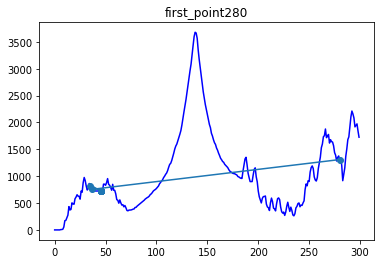

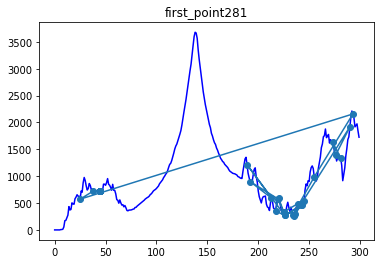

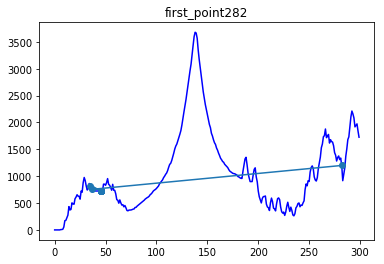

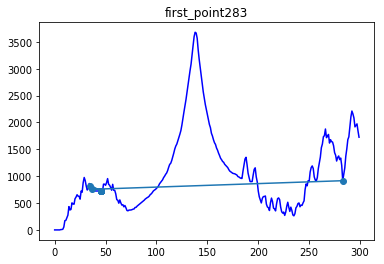

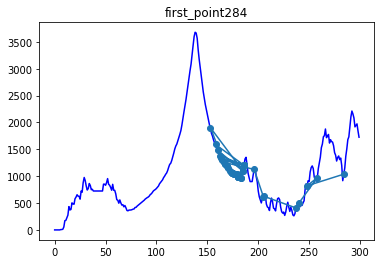

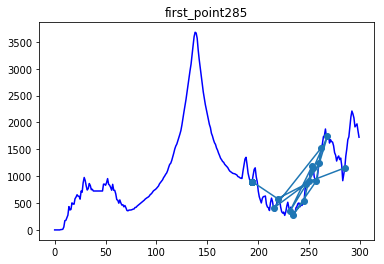

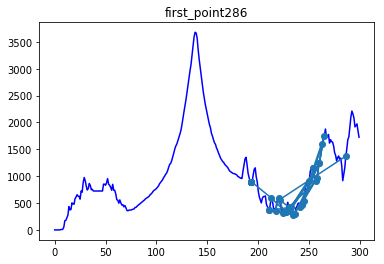

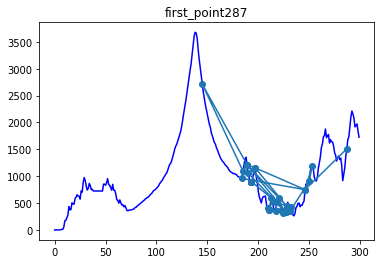

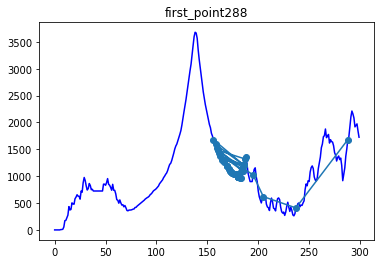

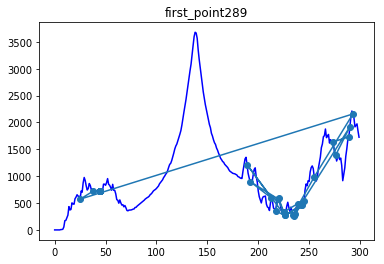

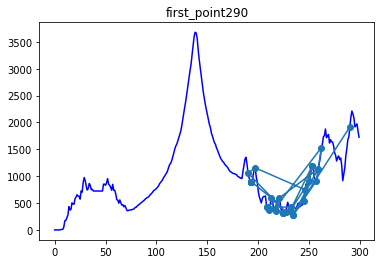

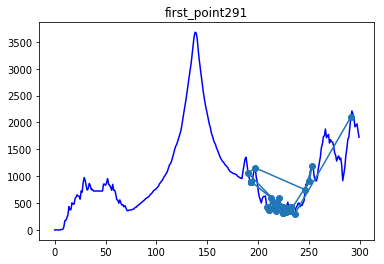

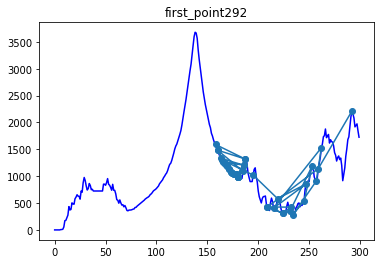

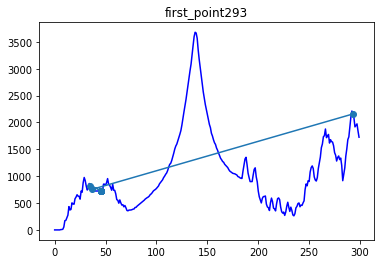

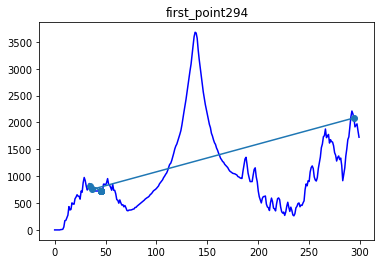

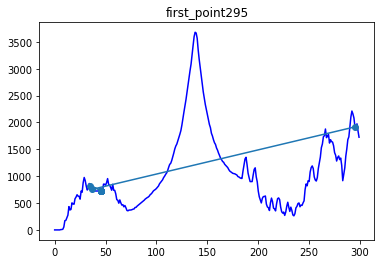

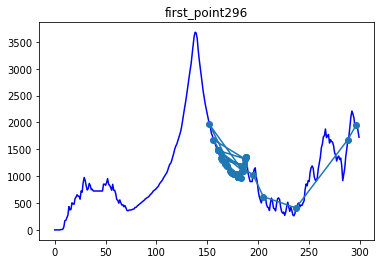

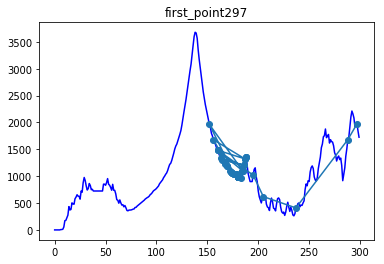

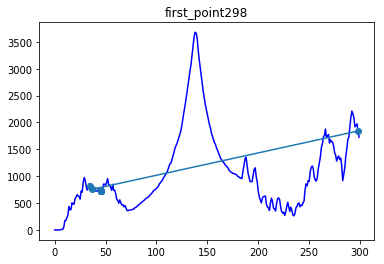

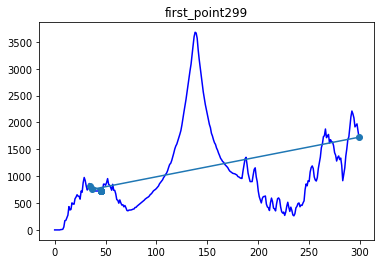

In [384]:
#それぞれの初期値についての動きを全て可視化
for i in range(len(point_init)):
    plt.plot(points, elevations, c = "b")
    plt.plot(point_history[i], elevations_at_moved_point[i], marker="o")
    plt.title('first_point{}'.format(point_init[i]))
    plt.show()

# 【問題6】（アドバンス課題）ハイパーパラメータの検証

In [388]:
#αを0.1から0.2単位で５つ設定
α = np.round(np.arange(0.1, 1, 0.2),2)
point_init = fuji[:, 0].astype(np.int64)

In [393]:
gezan_num = [] #無事下山した人の数のリスト
point_historys = [] # 移動リストのリスト
elevations_at_moved_points = [] #標高履歴のリスト
# αが複数あるのでループして計算していく
for i in α:
    point_history,  elevations_at_moved_point, minimum_elevation = gradient_fall_method_np(points, elevations, point_init, i,seed=1)
    gezan_num.append((minimum_elevation[:,1] == 0).sum()) #0の地点を経由できた人数を追加
    point_historys.append(point_history)
    elevations_at_moved_points.append(elevations_at_moved_point)

nostep=272
nostep=279
nostep=277
nostep=300
nostep=300


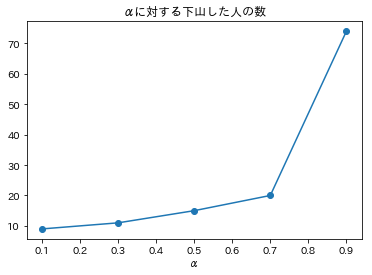

In [397]:
# αの値と０地点を経由することができた人の数の関係を可視化
plt.plot(α, gezan_num, marker="o")
plt.title('αに対する下山した人の数')
plt.xlabel('α')
plt.show()

今回の場合αが大きいほど０に到達する人数が増えた。

αが大きい程アグレッシブに山の全体を動き回ることとなり、局所最適解に捕まらずに０を経由することがあった。

# 【問題7】（アドバンス課題）局所最適解

局所的最適解とは収束した値が大域的な最小値にはなりづらく、今回の問題で言う山を超えづらく、一定の範囲の中の最小値に収束する。

その為初期値に依存しやすい。

対策としては複数の初期値から探索を行うことが挙げられる。

In [433]:
# 299までの整数の中から１０個をランダムに抽出
random_x = np.random.randint(0,299,30)

In [434]:
#ランダムに抽出された初期値からそれぞれ計算する。
α = 0.2
point_history,  elevations_at_moved_point, minimum_elevation = gradient_fall_method_np(points, elevations, random_x, α,seed=1)

nostep=30


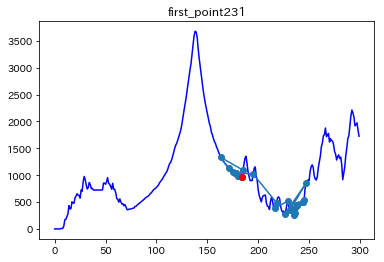

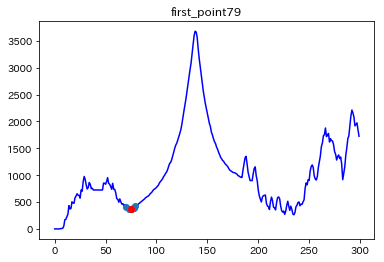

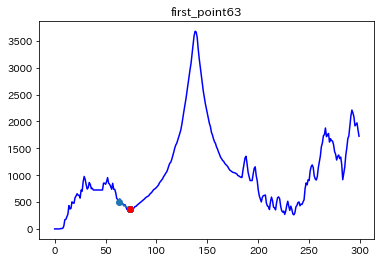

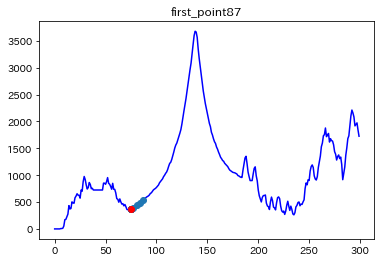

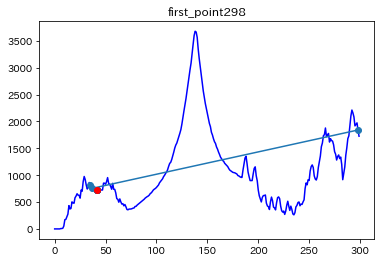

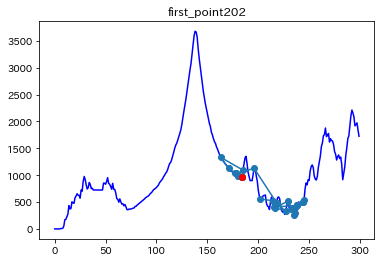

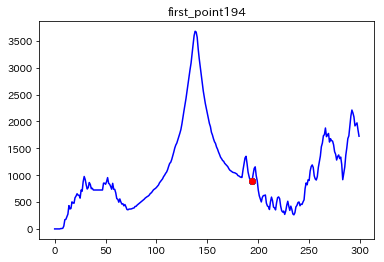

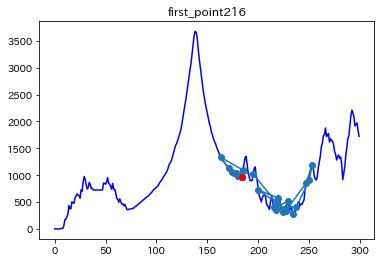

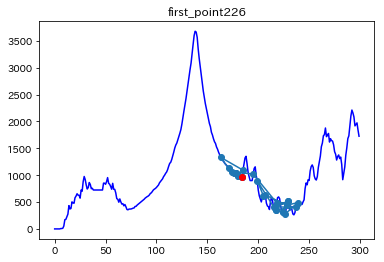

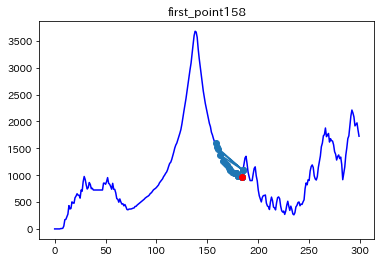

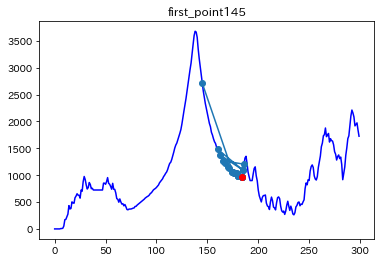

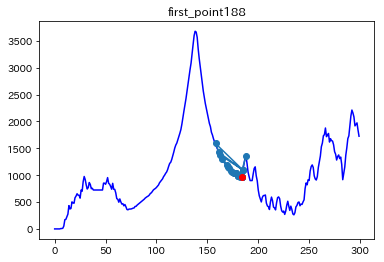

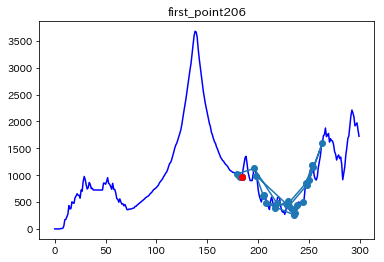

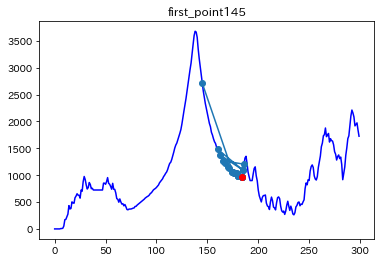

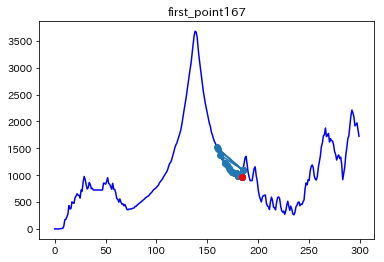

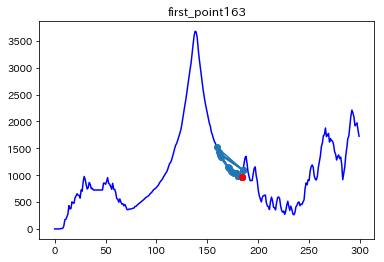

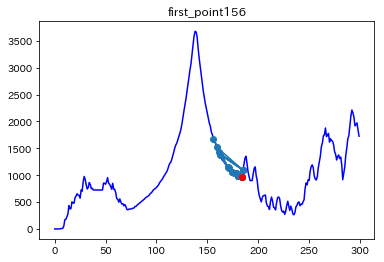

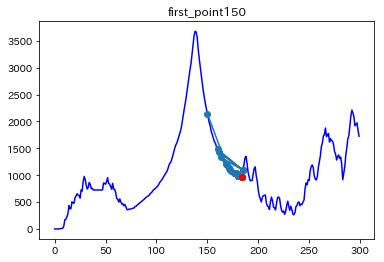

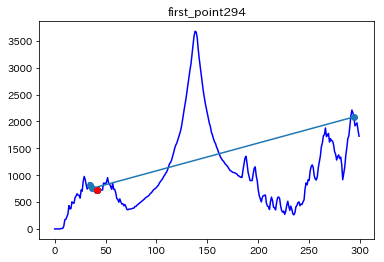

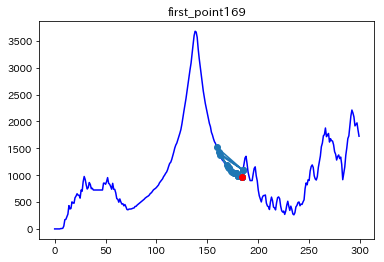

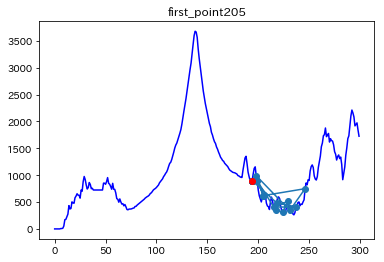

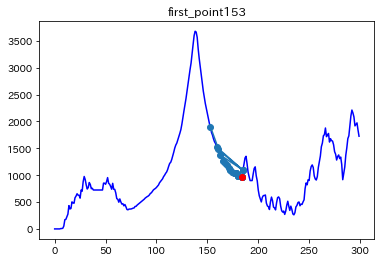

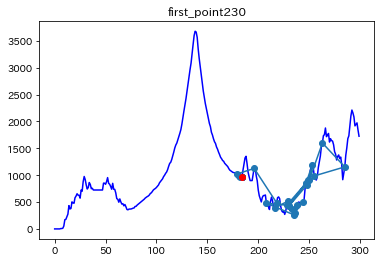

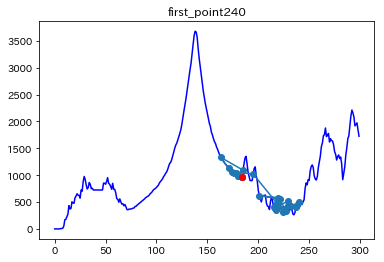

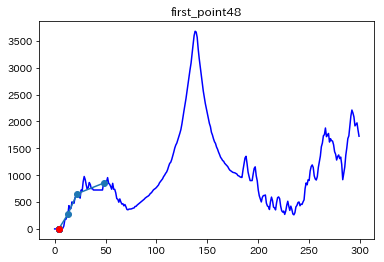

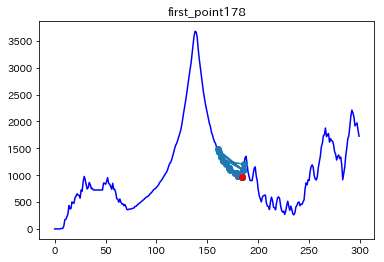

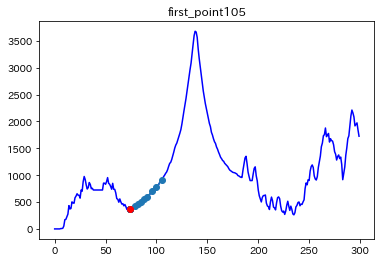

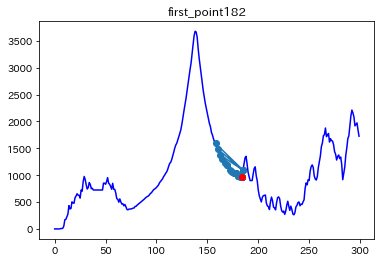

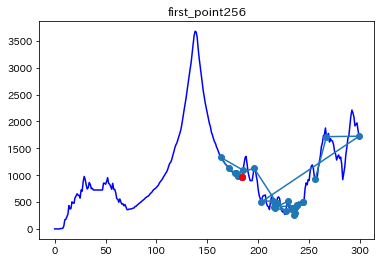

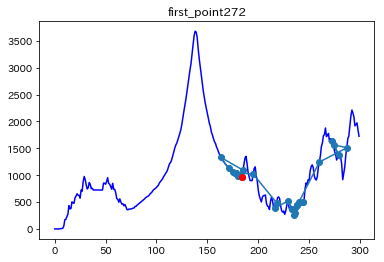

In [435]:
#可視化。赤い部分が収束値
for i in range(len(random_x)):
    plt.plot(points, elevations, c = "b")
    plt.plot(point_history[i], elevations_at_moved_point[i], marker="o")
    plt.plot(point_history[i,-1], elevations_at_moved_point[i,-1], c = "r",marker="o")
    plt.title('first_point{}'.format(random_x[i]))
    plt.show()

全ての初期値から計算するわけではなくランダムに初期値を設定して最小値を目指していくのが確率的勾配降下法だと理解したけど、合っているかあまりわからない。。。